
# **Segmentasi Provinsi Rawan Krisis pangan Berdasarkan Pola Harga Komoditas Pangan Menggunakan Algoritma Fuzzy C-Means Clustering**


## **Import Library Yang dibutuhkan**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
import pickle
import skfuzzy as fuzz
from skfuzzy import cluster
from pathlib import Path
import os
from glob import glob
from scipy.spatial.distance import cdist
from scipy import stats
from matplotlib.patches import Rectangle

## **Load Semua Dataset yang dibutuhkan**

In [7]:
BASE_DIR = Path('dataset')
TRAIN_DIR = BASE_DIR / 'train'


In [8]:
KOMODITAS = {
    'bawang_merah': 'Bawang Merah.csv',
    'beras_medium': 'Beras Medium.csv',
    'beras_premium' : 'Beras Premium.csv',
    'minyak_curah': 'Minyak Goreng Curah.csv',
    'telur_ayam': 'Telur Ayam Ras.csv',
    'gula': 'Gula Konsumsi.csv',
    'Bawang_Putih_Bonggol' : 'Bawang Putih Bonggol.csv',
    'Cabai_Merah_Keriting' : 'Cabai Merah Keriting.csv',
    'Cabai_Rawit_Merah' : 'Cabai Rawit Merah.csv',
    'Daging_Ayam_Ras' : 'Daging Ayam Ras.csv',
    'Daging_Sapi_Murni': 'Daging Sapi Murni.csv',
    'Minyak_Goreng_Kemasan_Sederhana' : 'Minyak Goreng Kemasan Sederhana.csv',
    'Tepung_Terigu_Curah' : 'Tepung Terigu (Curah).csv'
}

In [9]:
data = {}
for key, filename in KOMODITAS.items():
    file_path = TRAIN_DIR / filename
    data[key] = pd.read_csv(file_path)
    print(f"✓ {key}: {data[key].shape}")


✓ bawang_merah: (1004, 35)
✓ beras_medium: (1004, 35)
✓ beras_premium: (1004, 35)
✓ minyak_curah: (1004, 35)
✓ telur_ayam: (1004, 35)
✓ gula: (1004, 35)
✓ Bawang_Putih_Bonggol: (1004, 35)
✓ Cabai_Merah_Keriting: (1004, 35)
✓ Cabai_Rawit_Merah: (1004, 35)
✓ Daging_Ayam_Ras: (1004, 35)
✓ Daging_Sapi_Murni: (1004, 35)
✓ Minyak_Goreng_Kemasan_Sederhana: (1004, 35)
✓ Tepung_Terigu_Curah: (1004, 35)


## **EXPLORATORY DATA ANALYSIS(EDA)**

In [10]:
print("=" * 70)
print("DATA SHAPE")
print("=" * 70)
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")


DATA SHAPE
bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
minyak_curah         : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Cabai_Rawit_Merah    : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


In [11]:
print("\n" + "=" * 70)
print("SAMPLE DATA: Bawang Merah (First 5 rows)")
print("=" * 70)
print(data['bawang_merah'].head())


SAMPLE DATA: Bawang Merah (First 5 rows)
         Date     Aceh     Bali   Banten  Bengkulu  DI Yogyakarta  \
0  2022-01-01  28970.0  20870.0  26890.0   26650.0        25240.0   
1  2022-01-02  29900.0  20710.0  25600.0   26950.0        25240.0   
2  2022-01-03  28970.0  20510.0  26390.0   27290.0        24620.0   
3  2022-01-04  29600.0  20180.0  26630.0   27450.0        24370.0   
4  2022-01-05  29540.0  19960.0  26610.0   27710.0        24210.0   

   DKI Jakarta  Gorontalo    Jambi  Jawa Barat  ...    Papua     Riau  \
0      35510.0    31740.0  23390.0     25800.0  ...  48610.0  29240.0   
1      31850.0    30020.0  23550.0     26010.0  ...  50160.0  28750.0   
2      34880.0    31250.0  23730.0     25910.0  ...  49510.0  27870.0   
3      35260.0    31640.0  23300.0     25950.0  ...  49670.0  28330.0   
4      35260.0    34010.0  23640.0     25700.0  ...  46590.0  28240.0   

   Sulawesi Barat  Sulawesi Selatan  Sulawesi Tengah  Sulawesi Tenggara  \
0         25160.0           2

In [12]:
print("\n" + "=" * 70)
print("MISSING VALUES")
print("=" * 70)
for key, df in data.items():
    total_cells = df.shape[0] * df.shape[1]
    missing = df.isnull().sum().sum()
    missing_pct = (missing / total_cells) * 100
    print(f"{key:20s} : {missing} missing ({missing_pct:.2f}%)")


MISSING VALUES
bawang_merah         : 1241 missing (3.53%)
beras_medium         : 1241 missing (3.53%)
beras_premium        : 1241 missing (3.53%)
minyak_curah         : 5437 missing (15.47%)
telur_ayam           : 1241 missing (3.53%)
gula                 : 1241 missing (3.53%)
Bawang_Putih_Bonggol : 1241 missing (3.53%)
Cabai_Merah_Keriting : 1244 missing (3.54%)
Cabai_Rawit_Merah    : 2035 missing (5.79%)
Daging_Ayam_Ras      : 1241 missing (3.53%)
Daging_Sapi_Murni    : 1245 missing (3.54%)
Minyak_Goreng_Kemasan_Sederhana : 1289 missing (3.67%)
Tepung_Terigu_Curah  : 1242 missing (3.53%)


In [13]:
print("=" * 70)
print("MISSING VALUE PATTERN ANALYSIS")
print("=" * 70)

for key, df in data.items():
    print(f"\n📊 {key.upper()}")
    print("-" * 70)
    
    # Hitung missing per kolom (provinsi)
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0].sort_values(ascending=False)
    
    if len(missing_per_col) > 0:
        print(f"Provinsi dengan missing value:")
        for prov, count in missing_per_col.head(10).items():
            pct = (count / len(df)) * 100
            print(f"  {prov:25s} : {count:4d} missing ({pct:5.2f}%)")
    else:
        print("  ✓ No missing values")
    
    # Hitung missing per baris (tanggal)
    missing_per_row = df.isnull().sum(axis=1)
    rows_with_missing = (missing_per_row > 0).sum()
    print(f"\nBaris dengan missing: {rows_with_missing} dari {len(df)} ({(rows_with_missing/len(df))*100:.2f}%)")

MISSING VALUE PATTERN ANALYSIS

📊 BAWANG_MERAH
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat               :   39 missing ( 3.88%)
  Kalimantan Utara          :   39 missing ( 3.88%)
  Sumatera Selatan          :   38 missing ( 3.78%)
  Kepulauan Bangka Belitung :   38 missing ( 3.78%)
  Jambi                     :   38 missing ( 3.78%)
  Nusa Tenggara Barat       :   37 missing ( 3.69%)
  Aceh                      :   37 missing ( 3.69%)

Baris dengan missing: 46 dari 1004 (4.58%)

📊 BERAS_MEDIUM
----------------------------------------------------------------------
Provinsi dengan missing value:
  Kalimantan Timur          :   39 missing ( 3.88%)
  Kepulauan Riau            :   39 missing ( 3.88%)
  Sulawesi Barat            :   39 missing ( 3.88%)
  Papua Barat

### Analisis

dapat dilihat dari analisis missing value pattern,komoditas Cabe Rawit dan Minyak Curah menunjukkan missing value yg parah masing-masing $\pm 48\% $ dan $\pm 80 \% $,maka dari itu daripada drop provinsi lebih baik drop komoditas dengan tujuan agar tetap relevent dengan judul saya.dengan melakukan interpolasi linear untuk missing value dengan gap <10 hari dan null data yg  punya gap > 10 hari dengan menggunakan interpolasi linear,interpolasi adalah mencari fungsi yang lewat semua titik data dengan harapan dapat mengisi missing value

### **Cleaning**

In [14]:
print("="*70)
print("MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP")
print("="*70)

DROP_COMMODITIES = []

for key, df in data.items():
    missing_per_col = df.isnull().sum()
    missing_per_col = missing_per_col[missing_per_col > 0]
    
    if len(missing_per_col) == 0:
        print(f"✓ {key:25s} | No missing | KEEP")
        continue

    # Missing % per provinsi
    missing_pct = missing_per_col / len(df) * 100
    
    prov_high = (missing_pct > 15).sum()
    prov_extreme = (missing_pct > 50).sum()
    worst_pct = missing_pct.max()

    # Keputusan: drop komoditas jika terlalu buruk
    if prov_extreme > 0 or prov_high > 3:
        DROP_COMMODITIES.append(key)
        print(f"❌ {key:25s} | Worst {worst_pct:5.1f}% | Drop commodity")
    else:
        print(f"✓ {key:25s} | Worst {worst_pct:5.1f}% | Keep")

print(f"\nFINAL DECISION: Keep {13 - len(DROP_COMMODITIES)}, Drop {len(DROP_COMMODITIES)}\n")


MISSING VALUE ANALYSIS — DECIDING WHICH COMMODITIES TO DROP
✓ bawang_merah              | Worst   3.9% | Keep
✓ beras_medium              | Worst   3.9% | Keep
✓ beras_premium             | Worst   3.9% | Keep
❌ minyak_curah              | Worst  34.3% | Drop commodity
✓ telur_ayam                | Worst   3.9% | Keep
✓ gula                      | Worst   3.9% | Keep
✓ Bawang_Putih_Bonggol      | Worst   3.9% | Keep
✓ Cabai_Merah_Keriting      | Worst   3.9% | Keep
❌ Cabai_Rawit_Merah         | Worst  77.9% | Drop commodity
✓ Daging_Ayam_Ras           | Worst   3.9% | Keep
✓ Daging_Sapi_Murni         | Worst   4.0% | Keep
✓ Minyak_Goreng_Kemasan_Sederhana | Worst   8.2% | Keep
✓ Tepung_Terigu_Curah       | Worst   4.0% | Keep

FINAL DECISION: Keep 11, Drop 2



In [15]:
print(f"hapus 2 komoditas minyah curah dan Cabai rawit merah")
for key in DROP_COMMODITIES:
    if key in data:
        del data[key]

hapus 2 komoditas minyah curah dan Cabai rawit merah


In [16]:
for key, df in data.items():
    print(f"{key:20s} : {df.shape[0]} rows × {df.shape[1]} columns")

bawang_merah         : 1004 rows × 35 columns
beras_medium         : 1004 rows × 35 columns
beras_premium        : 1004 rows × 35 columns
telur_ayam           : 1004 rows × 35 columns
gula                 : 1004 rows × 35 columns
Bawang_Putih_Bonggol : 1004 rows × 35 columns
Cabai_Merah_Keriting : 1004 rows × 35 columns
Daging_Ayam_Ras      : 1004 rows × 35 columns
Daging_Sapi_Murni    : 1004 rows × 35 columns
Minyak_Goreng_Kemasan_Sederhana : 1004 rows × 35 columns
Tepung_Terigu_Curah  : 1004 rows × 35 columns


## **EXPLORATORY DATA ANALYSIS Lanjutan(EDA)**
EDA lanjutan untuk mengetahui bagaimana karateristik data secara keseluruhan

1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES

Total province-commodity pairs with missing: 374

Missing percentage distribution:
count    374.000000
mean       3.650372
std        0.281768
min        3.386454
25%        3.486056
50%        3.685259
75%        3.685259
max        8.167331
Name: missing_pct, dtype: float64


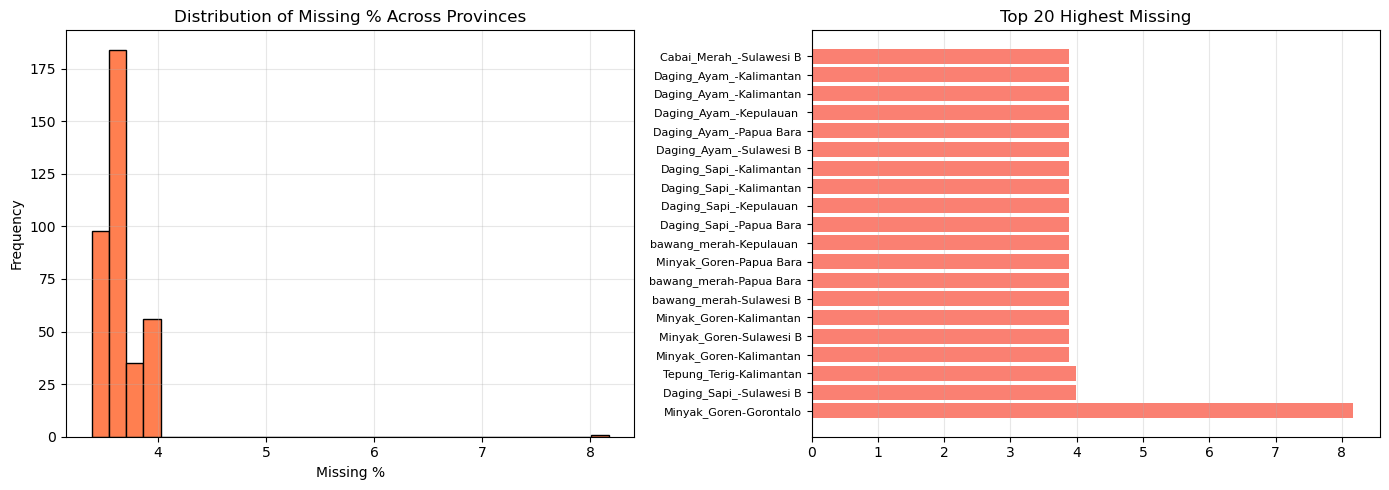

In [17]:

print("="*70)
print("1️⃣ MISSING VALUE PATTERN ACROSS ALL PROVINCES")
print("="*70)

missing_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        total = len(df)
        miss = df[col].isnull().sum()

        if miss > 0:
            missing_data.append({
                "commodity": key,
                "province": col,
                "missing_count": miss,
                "missing_pct": miss / total * 100,
            })

df_missing = pd.DataFrame(missing_data)

print(f"\nTotal province-commodity pairs with missing: {len(df_missing)}")
print("\nMissing percentage distribution:")
print(df_missing["missing_pct"].describe())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].hist(df_missing["missing_pct"], bins=30, edgecolor="black", color="coral")
axes[0].set_title("Distribution of Missing % Across Provinces")
axes[0].set_xlabel("Missing %")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, alpha=0.3)

df_missing_sorted = df_missing.sort_values("missing_pct", ascending=False).head(20)
axes[1].barh(range(len(df_missing_sorted)), df_missing_sorted["missing_pct"], color="salmon")
axes[1].set_yticks(range(len(df_missing_sorted)))
axes[1].set_yticklabels([
    f"{row['commodity'][:12]}-{row['province'][:10]}" 
    for _, row in df_missing_sorted.iterrows()
], fontsize=8)
axes[1].set_title("Top 20 Highest Missing")
axes[1].grid(True, alpha=0.3, axis="x")

plt.tight_layout()
plt.show()



2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES

Gap statistics:
          max_gap    mean_gap    num_gaps
count  374.000000  374.000000  374.000000
mean    34.235294   17.476426    2.612299
std      2.342803    9.049526    1.104200
min     34.000000    7.800000    1.000000
25%     34.000000   12.333333    2.000000
50%     34.000000   12.333333    3.000000
75%     34.000000   18.000000    3.000000
max     79.000000   41.000000    5.000000


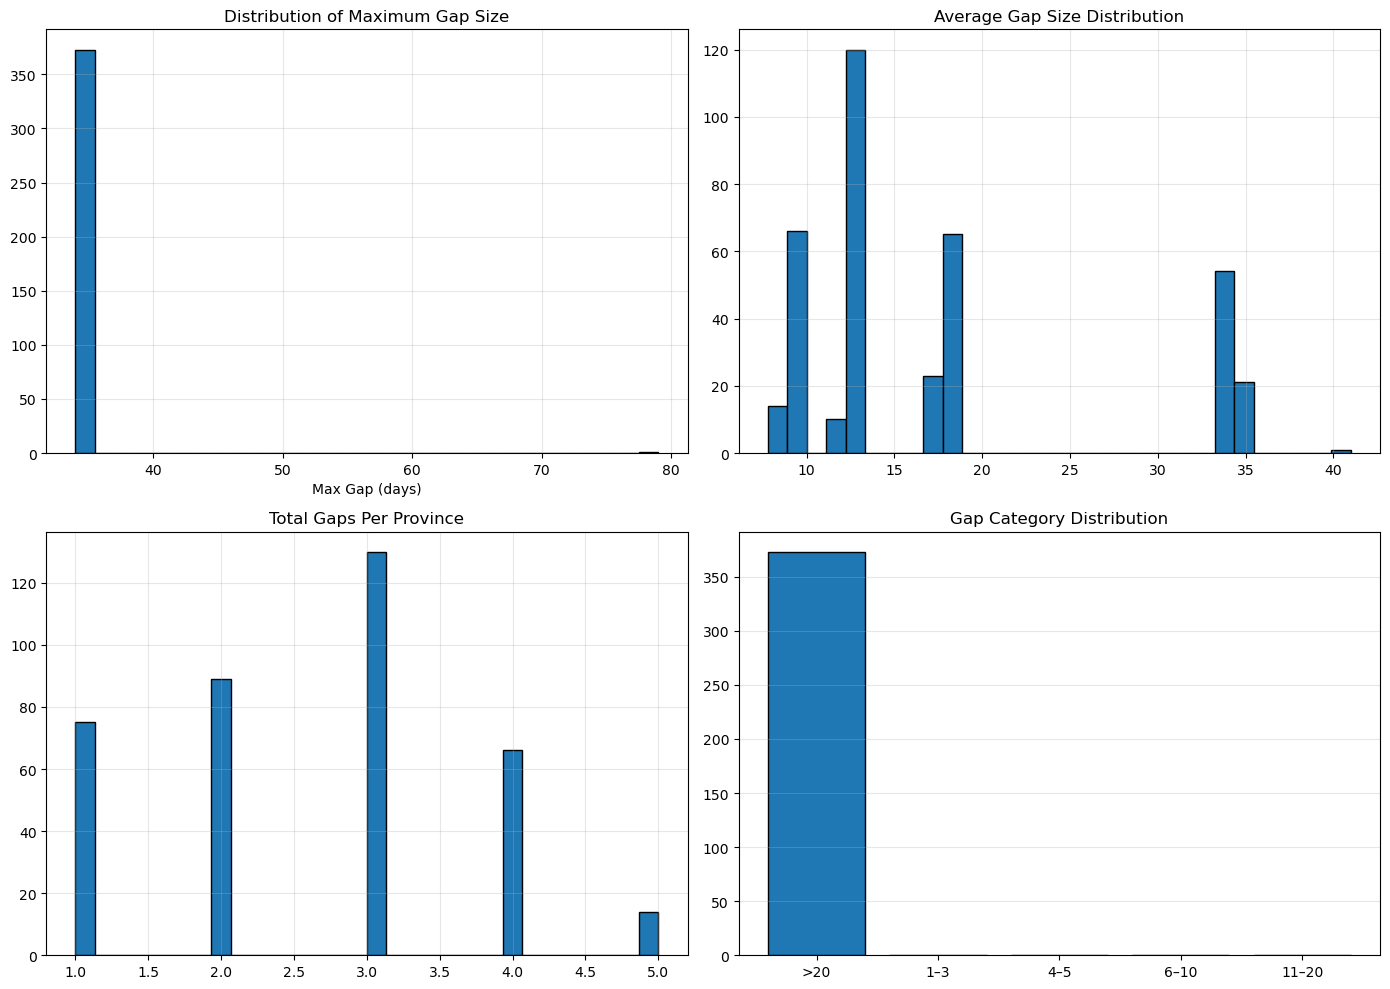

In [18]:
print("\n" + "="*70)
print("2️⃣ GAP SIZE ANALYSIS - ALL PROVINCES")
print("="*70)

gap_data = []

for key, df in data.items():
    for col in df.columns:
        if col == "Date": 
            continue
        
        if not df[col].isnull().any():
            continue

        is_null = df[col].isnull()
        gap = 0
        gaps = []

        for v in is_null:
            if v:
                gap += 1
            else:
                if gap > 0:
                    gaps.append(gap)
                gap = 0
        
        if gap > 0:
            gaps.append(gap)

        if gaps:
            gap_data.append({
                "commodity": key,
                "province": col,
                "num_gaps": len(gaps),
                "max_gap": max(gaps),
                "mean_gap": np.mean(gaps),
                "total_missing": sum(gaps)
            })

df_gaps = pd.DataFrame(gap_data)

print("\nGap statistics:")
print(df_gaps[["max_gap", "mean_gap", "num_gaps"]].describe())

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14,10))

axes[0,0].hist(df_gaps["max_gap"], bins=30, edgecolor="black")
axes[0,0].set_title("Distribution of Maximum Gap Size")
axes[0,0].set_xlabel("Max Gap (days)")
axes[0,0].grid(True, alpha=0.3)

axes[0,1].hist(df_gaps["mean_gap"], bins=30, edgecolor="black")
axes[0,1].set_title("Average Gap Size Distribution")
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df_gaps["num_gaps"], bins=30, edgecolor="black")
axes[1,0].set_title("Total Gaps Per Province")
axes[1,0].grid(True, alpha=0.3)

gap_cat = pd.cut(df_gaps["max_gap"], bins=[0,3,5,10,20,50], 
                 labels=["1–3","4–5","6–10","11–20",">20"])
axes[1,1].bar(gap_cat.value_counts().index, gap_cat.value_counts().values, edgecolor="black")
axes[1,1].set_title("Gap Category Distribution")
axes[1,1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()



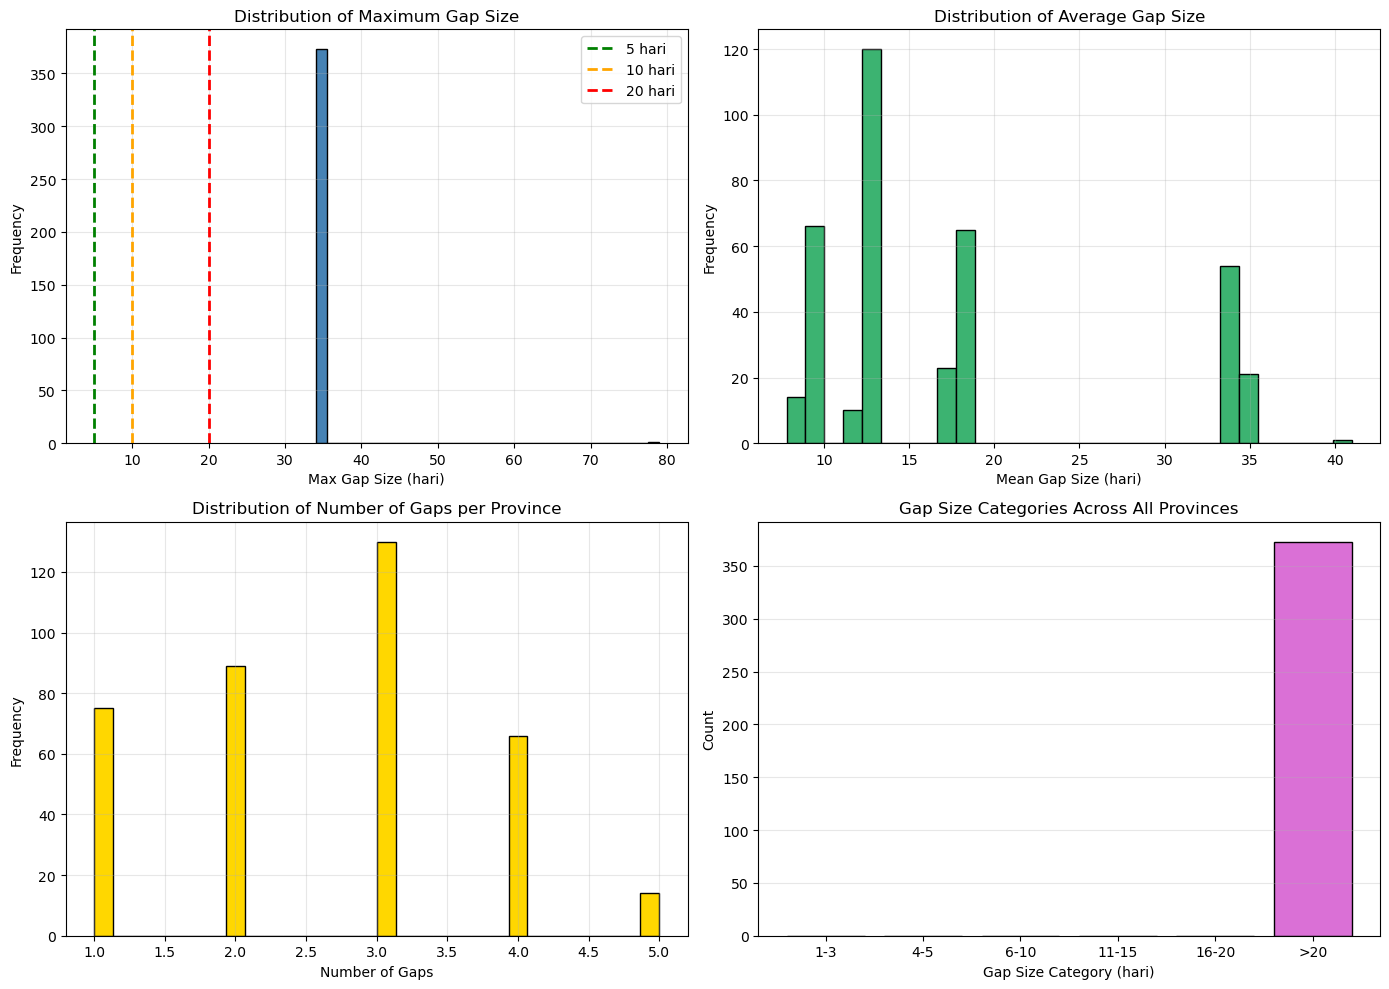

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Max gap distribution
axes[0, 0].hist(df_gaps['max_gap'], bins=30, edgecolor='black', color='steelblue')
axes[0, 0].axvline(5, color='green', linestyle='--', label='5 hari', linewidth=2)
axes[0, 0].axvline(10, color='orange', linestyle='--', label='10 hari', linewidth=2)
axes[0, 0].axvline(20, color='red', linestyle='--', label='20 hari', linewidth=2)
axes[0, 0].set_xlabel('Max Gap Size (hari)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Maximum Gap Size')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean gap distribution
axes[0, 1].hist(df_gaps['mean_gap'], bins=30, edgecolor='black', color='mediumseagreen')
axes[0, 1].set_xlabel('Mean Gap Size (hari)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Average Gap Size')
axes[0, 1].grid(True, alpha=0.3)

# Number of gaps
axes[1, 0].hist(df_gaps['num_gaps'], bins=30, edgecolor='black', color='gold')
axes[1, 0].set_xlabel('Number of Gaps')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Number of Gaps per Province')
axes[1, 0].grid(True, alpha=0.3)

# Gap categories
gap_categories = pd.cut(df_gaps['max_gap'], 
                        bins=[0, 3, 5, 10, 15, 20, 50], 
                        labels=['1-3', '4-5', '6-10', '11-15', '16-20', '>20'])
gap_cat_counts = gap_categories.value_counts().sort_index()
axes[1, 1].bar(range(len(gap_cat_counts)), gap_cat_counts.values, 
               color='orchid', edgecolor='black')
axes[1, 1].set_xticks(range(len(gap_cat_counts)))
axes[1, 1].set_xticklabels(gap_cat_counts.index, rotation=0)
axes[1, 1].set_xlabel('Gap Size Category (hari)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Gap Size Categories Across All Provinces')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout() 
plt.show()



3️⃣ PRICE STATISTICS ACROSS PROVINCES

Price statistics summary:
                mean           std          cv
count     374.000000    374.000000  374.000000
mean    35930.777325   3746.873047    0.117582
std     34442.998501   3604.258076    0.075433
min      9518.804124    387.530323    0.008657
25%     14884.531088   1472.670425    0.068415
50%     28024.621406   2079.735639    0.100341
75%     38757.899793   5936.227611    0.140750
max    159308.010363  16895.433212    0.386487


/tmp/ipykernel_104141/3473552502.py:54: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])


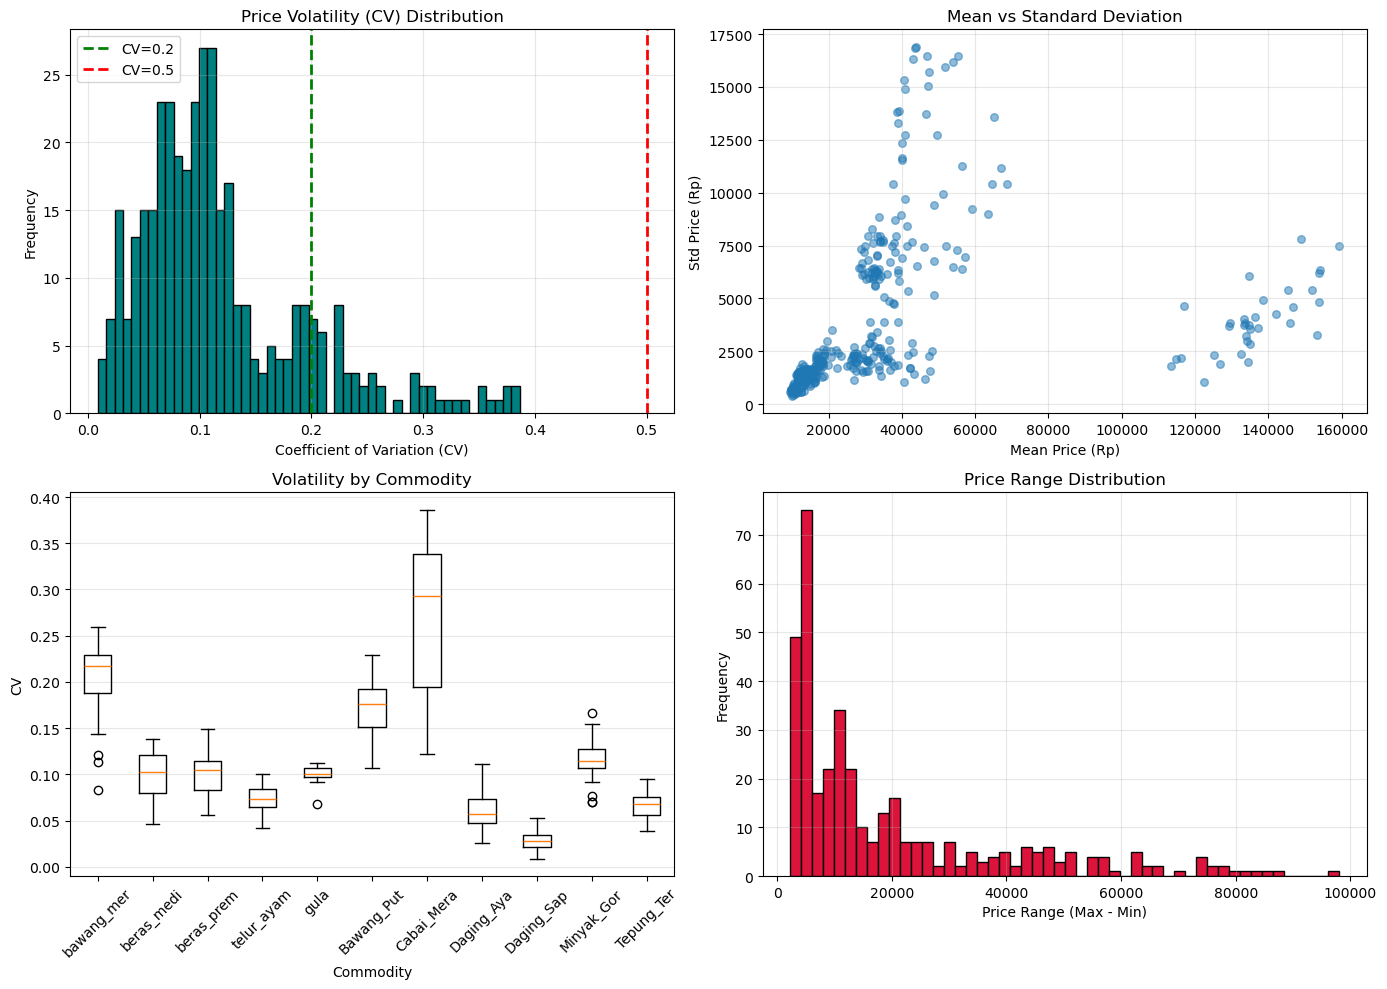

In [20]:
print("\n" + "="*70)
print("3️⃣ PRICE STATISTICS ACROSS PROVINCES")
print("="*70)

price_stats = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            price_stats.append({
                'commodity': key,
                'province': col,
                'mean': valid_data.mean(),
                'std': valid_data.std(),
                'cv': valid_data.std() / valid_data.mean() if valid_data.mean() > 0 else 0,
                'min': valid_data.min(),
                'max': valid_data.max(),
                'range': valid_data.max() - valid_data.min()
            })

df_prices = pd.DataFrame(price_stats)

print(f"\nPrice statistics summary:")
print(df_prices[['mean', 'std', 'cv']].describe())

# Plot price characteristics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CV distribution
axes[0, 0].hist(df_prices['cv'], bins=50, edgecolor='black', color='teal')
axes[0, 0].axvline(0.2, color='green', linestyle='--', label='CV=0.2', linewidth=2)
axes[0, 0].axvline(0.5, color='red', linestyle='--', label='CV=0.5', linewidth=2)
axes[0, 0].set_xlabel('Coefficient of Variation (CV)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Price Volatility (CV) Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Mean vs Std scatter
axes[0, 1].scatter(df_prices['mean'], df_prices['std'], alpha=0.5, s=30)
axes[0, 1].set_xlabel('Mean Price (Rp)')
axes[0, 1].set_ylabel('Std Price (Rp)')
axes[0, 1].set_title('Mean vs Standard Deviation')
axes[0, 1].grid(True, alpha=0.3)

# Boxplot by commodity
commodities = df_prices['commodity'].unique()
cv_by_commodity = [df_prices[df_prices['commodity'] == c]['cv'].values for c in commodities]
axes[1, 0].boxplot(cv_by_commodity, labels=[c[:10] for c in commodities])
axes[1, 0].set_xlabel('Commodity')
axes[1, 0].set_ylabel('CV')
axes[1, 0].set_title('Volatility by Commodity')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Price range distribution
axes[1, 1].hist(df_prices['range'], bins=50, edgecolor='black', color='crimson')
axes[1, 1].set_xlabel('Price Range (Max - Min)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Price Range Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [21]:
print("\n" + "="*70)
print("4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)")
print("="*70)

outlier_counts = []

for key, df in data.items():
    for col in df.columns:
        if col == 'Date':
            continue
        
        valid_data = df[col].dropna()
        
        if len(valid_data) > 0:
            Q1 = valid_data.quantile(0.25)
            Q3 = valid_data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 3 * IQR
            upper_bound = Q3 + 3 * IQR
            
            outliers = ((valid_data < lower_bound) | (valid_data > upper_bound)).sum()
            outlier_pct = (outliers / len(valid_data)) * 100
            
            if outliers > 0:
                outlier_counts.append({
                    'commodity': key,
                    'province': col,
                    'outliers': outliers,
                    'outlier_pct': outlier_pct
                })

df_outliers = pd.DataFrame(outlier_counts)

print(f"\nProvince-commodity pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

if len(df_outliers) > 0:
    print(f"\nOutlier percentage statistics:")
    print(df_outliers['outlier_pct'].describe())
    
    print(f"\nTop 15 provinces with most outliers:")
    print(df_outliers.sort_values('outlier_pct', ascending=False).head(15).to_string(index=False))

# ============================================
# SUMMARY & RECOMMENDATIONS
# ============================================

print("\n" + "="*70)
print("SUMMARY & RECOMMENDATIONS")
print("="*70)

print(f"\n📊 Data Characteristics:")
print(f"  • Total province-commodity pairs: {len(df_prices)}")
print(f"  • Pairs with missing: {len(df_missing)} ({len(df_missing)/len(df_prices)*100:.1f}%)")
print(f"  • Pairs with gaps ≤ 10 hari: {(df_gaps['max_gap'] <= 10).sum()} ({(df_gaps['max_gap'] <= 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with gaps > 10 hari: {(df_gaps['max_gap'] > 10).sum()} ({(df_gaps['max_gap'] > 10).sum()/len(df_gaps)*100:.1f}%)")
print(f"  • Pairs with outliers: {len(df_outliers)} ({len(df_outliers)/len(df_prices)*100:.1f}%)")

avg_cv = df_prices['cv'].mean()
print(f"  • Average CV (volatility): {avg_cv:.3f}")

print(f"\n💡 Interpolation Strategy Recommendations:")

gap_10_pct = (df_gaps['max_gap'] <= 10).sum() / len(df_gaps) * 100
print(f"  • {gap_10_pct:.1f}% pairs have max gap ≤ 10 hari")

if avg_cv < 0.2:
    print(f"  ✅ Low volatility → Linear interpolation suitable")
elif avg_cv < 0.5:
    print(f"  ⚠️  Medium volatility → Spline interpolation recommended")
else:
    print(f"  ❌ High volatility → Minimize interpolation")

if len(df_outliers) / len(df_prices) > 0.1:
    print(f"  ⚠️  {len(df_outliers)/len(df_prices)*100:.1f}% pairs have outliers → Outlier handling needed")

print(f"\n🎯 Recommended Approach:")
print(f"  1. Remove outliers using IQR method (3×IQR)")
print(f"  2. Interpolate gaps ≤ 10 hari")
print(f"  3. Keep gaps > 10 hari as NULL")
print(f"  4. Handle NULL in feature extraction phase")


4️⃣ OUTLIER ANALYSIS (IQR Method, 3×IQR)

Province-commodity pairs with outliers: 105 (28.1%)

Outlier percentage statistics:
count    105.000000
mean       4.662092
std        4.676522
min        0.103093
25%        0.413650
50%        2.066116
75%        8.799172
max       17.665289
Name: outlier_pct, dtype: float64

Top 15 provinces with most outliers:
                      commodity          province  outliers  outlier_pct
Minyak_Goreng_Kemasan_Sederhana              Bali       171    17.665289
Minyak_Goreng_Kemasan_Sederhana Sulawesi Tenggara       134    13.857291
              Daging_Sapi_Murni       Jawa Tengah       133    13.711340
              Daging_Sapi_Murni     DI Yogyakarta       130    13.429752
              Daging_Sapi_Murni Kalimantan Tengah       129    13.326446
              Daging_Sapi_Murni  Sulawesi Selatan       129    13.298969
Minyak_Goreng_Kemasan_Sederhana             Jambi       127    13.146998
Minyak_Goreng_Kemasan_Sederhana           Lampung       1

MISSING PATTERN CONSISTENCY ACROSS COMMODITIES

Bawang Merah vs Telur Ayam:
  Correlation of missing patterns: 1.0000
  ✅ VERY HIGH correlation → Missing pattern identik


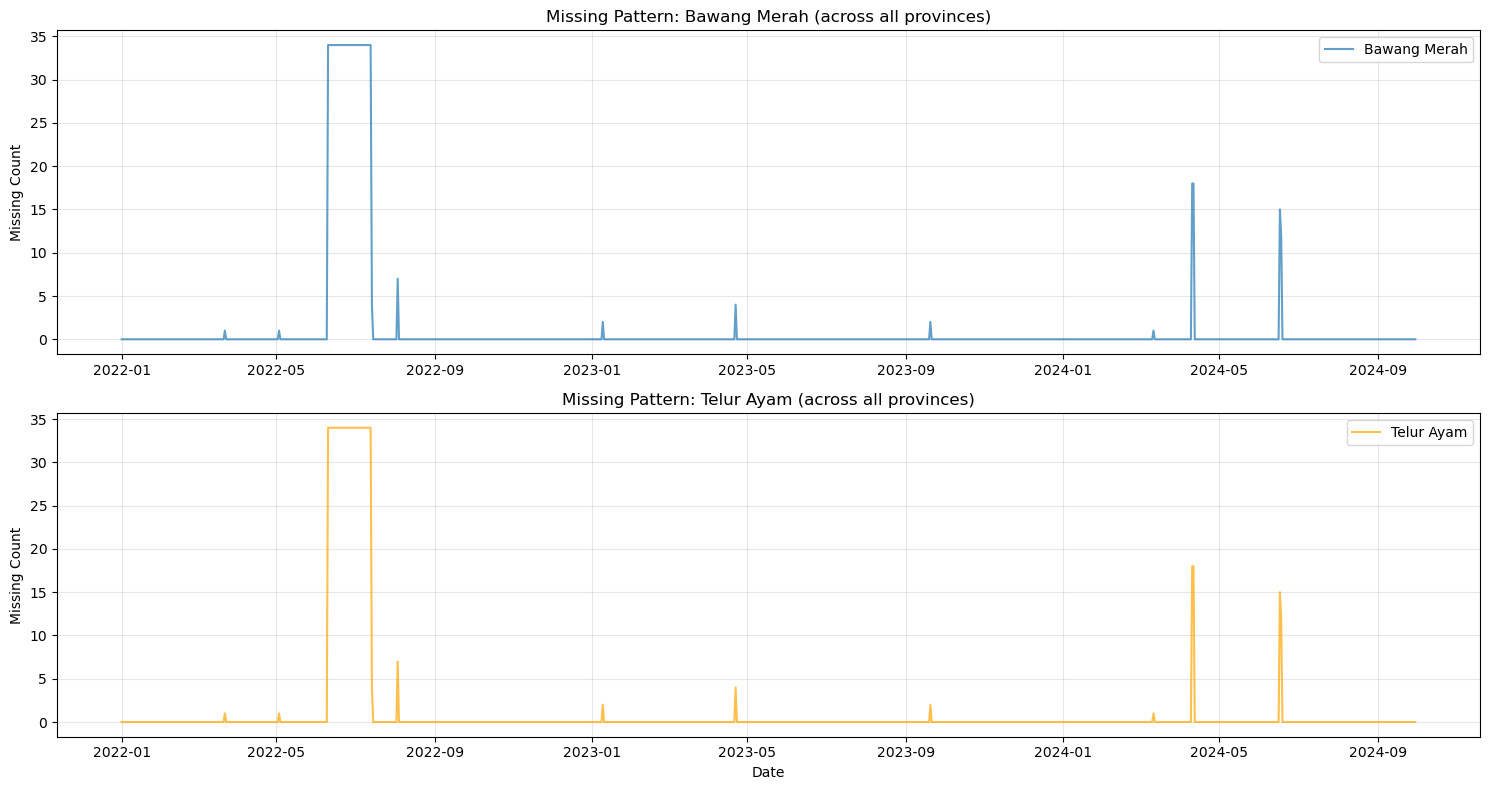

In [22]:
print("="*70)
print("MISSING PATTERN CONSISTENCY ACROSS COMMODITIES")
print("="*70)

# Ambil 2 komoditas untuk comparison
df1 = data['bawang_merah']
df2 = data['telur_ayam']

# Convert Date column
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Hitung missing per tanggal (across all provinces)
missing_per_date_1 = df1.drop('Date', axis=1).isnull().sum(axis=1)
missing_per_date_2 = df2.drop('Date', axis=1).isnull().sum(axis=1)

# Correlation test
correlation = np.corrcoef(missing_per_date_1, missing_per_date_2)[0, 1]

print(f"\nBawang Merah vs Telur Ayam:")
print(f"  Correlation of missing patterns: {correlation:.4f}")

if correlation > 0.9:
    print(f"  ✅ VERY HIGH correlation → Missing pattern identik")
elif correlation > 0.7:
    print(f"  ⚠️  High correlation → Missing pattern similar")
else:
    print(f"  ❌ Low correlation → Missing pattern DIFFERENT")

# Plot
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(df1['Date'], missing_per_date_1, label='Bawang Merah', alpha=0.7)
axes[0].set_ylabel('Missing Count')
axes[0].set_title('Missing Pattern: Bawang Merah (across all provinces)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(df2['Date'], missing_per_date_2, label='Telur Ayam', color='orange', alpha=0.7)
axes[1].set_ylabel('Missing Count')
axes[1].set_xlabel('Date')
axes[1].set_title('Missing Pattern: Telur Ayam (across all provinces)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

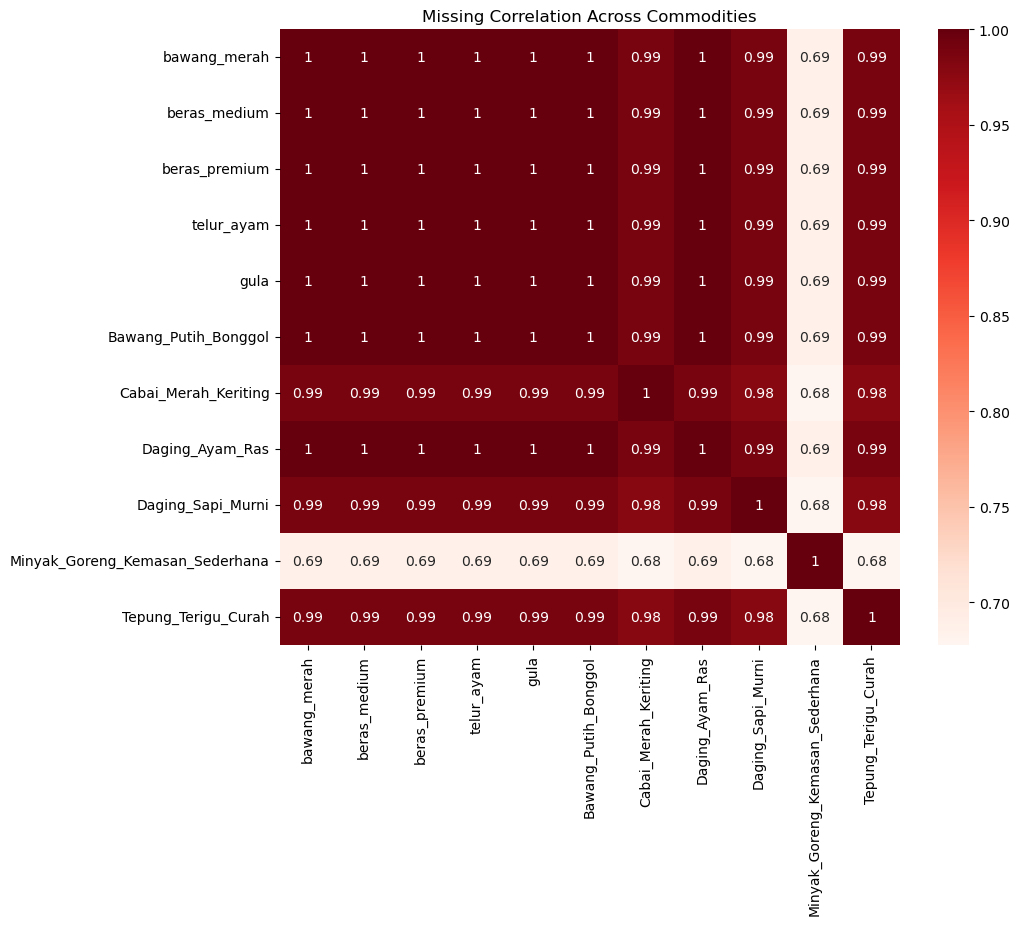

In [23]:
# dataframe: index = Date, columns = komoditas, value = 1 (missing) / 0 (not missing)
missing_matrix = pd.DataFrame(index=data[list(data.keys())[0]]['Date'])

for key, df in data.items():
    miss = df.drop(columns=['Date']).isna().any(axis=1).astype(int)
    missing_matrix[key] = miss.values

missing_corr = missing_matrix.corr()
missing_corr

plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, annot=True, cmap='Reds')
plt.title("Missing Correlation Across Commodities")
plt.show()


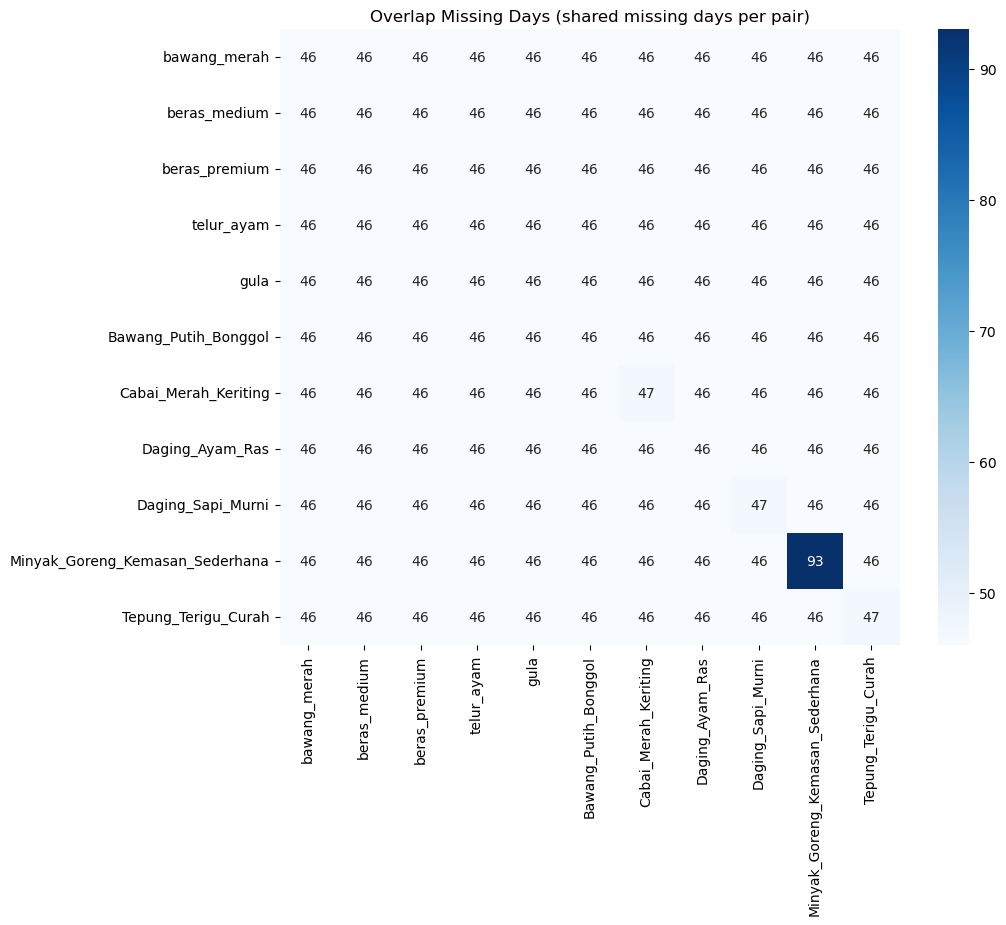

In [24]:
# dataframe: index = Date, columns = komoditas, value = 1 (missing) / 0 (not missing)
missing_matrix = pd.DataFrame(index=data[list(data.keys())[0]]['Date'])

for key, df in data.items():
    miss = df.drop(columns=['Date']).isna().any(axis=1).astype(int)
    missing_matrix[key] = miss.values


overlap = missing_matrix.T.dot(missing_matrix)
overlap
plt.figure(figsize=(10,8))
sns.heatmap(overlap, annot=True, cmap="Blues")
plt.title("Overlap Missing Days (shared missing days per pair)")
plt.show()

### Analisis
Pada visualisasi korelasi missing value antar komoditas dengan heatmap terlihat bahwa 10 dari 11 komoditas memiliki missing value yang identik yang dimana hal itu cukup untuk menarik kesimpulan bahwa tipe missing valuenya adalah MNAR atau dengan kata lain sistematis,sementara itu komoditas minyak goreng hanya memiliki korelasi sekitar $ 68\% $ ,ini mengartikan bahwa missing value pada komoditas minyak goreng berbeda dengan 10 komoditas lainnya sekitar $ 32 \%$  bersifat unik karena tidak muncul pada 10 komoditas lain,maka pilihannya adalah drop komoditas minyak goreng karena ada kemunkinan dimana kemunkinan besar komoditas minyak goreng adalah outlier

Visualisi Heatmap kedua bertujuan untuk menghitung jumlah hari yang sama ketika dua komoditas mengalami missing,hasil menunjukkan berbeda dengan komoditas lain yg mayoritas 46 - 47 hari minyang goreng malah missing sebanyak 93 hari artinya setengah missing di komoditas ini tidak muncul di komoditas lain, hal ini menegaskan bahwa komoditas minyak goreng adalah anomali atau outiers

## **Cleaning**

In [25]:
print(f"\nCommodities BEFORE drop: {len(data)}")
print("List:")
for commodity in data.keys():
    print(f"  - {commodity}")

# Drop Minyak Goreng
if 'Minyak_Goreng_Kemasan_Sederhana' in data:
    del data['Minyak_Goreng_Kemasan_Sederhana']
    print("\n✓ Minyak_Goreng_Kemasan_Sederhana DROPPED")

# Check commodities setelah drop
print(f"\nCommodities AFTER drop: {len(data)}")
print("Final list:")
for commodity in data.keys():
    print(f"  - {commodity}")



Commodities BEFORE drop: 11
List:
  - bawang_merah
  - beras_medium
  - beras_premium
  - telur_ayam
  - gula
  - Bawang_Putih_Bonggol
  - Cabai_Merah_Keriting
  - Daging_Ayam_Ras
  - Daging_Sapi_Murni
  - Minyak_Goreng_Kemasan_Sederhana
  - Tepung_Terigu_Curah

✓ Minyak_Goreng_Kemasan_Sederhana DROPPED

Commodities AFTER drop: 10
Final list:
  - bawang_merah
  - beras_medium
  - beras_premium
  - telur_ayam
  - gula
  - Bawang_Putih_Bonggol
  - Cabai_Merah_Keriting
  - Daging_Ayam_Ras
  - Daging_Sapi_Murni
  - Tepung_Terigu_Curah


In [26]:
# Blackout period (100% missing across all commodities)
BLACKOUT_START = '2022-06-10'
BLACKOUT_END = '2022-06-19'

data_no_blackout = {}

for commodity, df in data.items():
    # Convert Date column to datetime if not already
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Count rows before removal
    rows_before = len(df)
    
    # Remove blackout period
    mask = (df['Date'] >= BLACKOUT_START) & (df['Date'] <= BLACKOUT_END)
    df_cleaned = df[~mask].reset_index(drop=True)
    
    # Count rows after removal
    rows_after = len(df_cleaned)
    rows_removed = rows_before - rows_after
    
    # Store cleaned data
    data_no_blackout[commodity] = df_cleaned
    
    print(f"{commodity}: {rows_before} → {rows_after} rows ({rows_removed} removed)")

bawang_merah: 1004 → 994 rows (10 removed)
beras_medium: 1004 → 994 rows (10 removed)
beras_premium: 1004 → 994 rows (10 removed)
telur_ayam: 1004 → 994 rows (10 removed)
gula: 1004 → 994 rows (10 removed)
Bawang_Putih_Bonggol: 1004 → 994 rows (10 removed)
Cabai_Merah_Keriting: 1004 → 994 rows (10 removed)
Daging_Ayam_Ras: 1004 → 994 rows (10 removed)
Daging_Sapi_Murni: 1004 → 994 rows (10 removed)
Tepung_Terigu_Curah: 1004 → 994 rows (10 removed)


### Summary Cleaning
Menghapus komoditas minyak goreng dan menghapus rentang data yang kosong untuk 10 komoditas tersisa 

## **EDA Lanjutan Untuk Adaptive Cleaning**

In [27]:
# ============================================
# 2. COMMODITY-LEVEL CHARACTERISTICS
# ============================================

print("\n" + "="*70)
print("PART 1: COMMODITY-LEVEL PROFILING")
print("="*70)

commodity_profiles = []

for key, df in data.items():
    # Aggregate across all provinces
    all_values = []
    
    for col in df.columns:
        if col == 'Date':
            continue
        all_values.extend(df[col].dropna().values)
    
    if len(all_values) == 0:
        continue
    
    all_series = pd.Series(all_values)
    
    # Calculate statistics
    mean_price = all_series.mean()
    std_price = all_series.std()
    cv = std_price / mean_price
    min_price = all_series.min()
    max_price = all_series.max()
    price_range = max_price - min_price
    
    # Calculate IQR for outlier detection
    Q1 = all_series.quantile(0.25)
    Q3 = all_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Count potential outliers at different thresholds
    outliers_3x = ((all_series < Q1 - 3*IQR) | (all_series > Q3 + 3*IQR)).sum()
    outliers_4x = ((all_series < Q1 - 4*IQR) | (all_series > Q3 + 4*IQR)).sum()
    outliers_5x = ((all_series < Q1 - 5*IQR) | (all_series > Q3 + 5*IQR)).sum()
    outliers_6x = ((all_series < Q1 - 6*IQR) | (all_series > Q3 + 6*IQR)).sum()
    
    total_values = len(all_series)
    
    commodity_profiles.append({
        'commodity': key,
        'mean': mean_price,
        'std': std_price,
        'cv': cv,
        'min': min_price,
        'max': max_price,
        'range': price_range,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'outliers_3x': outliers_3x,
        'outliers_4x': outliers_4x,
        'outliers_5x': outliers_5x,
        'outliers_6x': outliers_6x,
        'outliers_3x_pct': outliers_3x / total_values * 100,
        'outliers_4x_pct': outliers_4x / total_values * 100,
        'outliers_5x_pct': outliers_5x / total_values * 100,
        'outliers_6x_pct': outliers_6x / total_values * 100,
        'total_values': total_values
    })

df_commodity = pd.DataFrame(commodity_profiles).sort_values('cv', ascending=False)

print("\n📊 COMMODITY VOLATILITY RANKING (by CV):")
print(df_commodity[['commodity', 'cv', 'mean', 'std']].to_string(index=False))

print("\n📊 OUTLIER SENSITIVITY ANALYSIS:")
print(df_commodity[['commodity', 'outliers_3x_pct', 'outliers_4x_pct', 
                     'outliers_5x_pct', 'outliers_6x_pct']].to_string(index=False))



PART 1: COMMODITY-LEVEL PROFILING

📊 COMMODITY VOLATILITY RANKING (by CV):
           commodity       cv          mean          std
Cabai_Merah_Keriting 0.329213  48723.424541 16040.381948
        bawang_merah 0.273676  36557.443380 10004.912170
Bawang_Putih_Bonggol 0.222945  35151.879921  7836.923623
     Daging_Ayam_Ras 0.158805  37212.982216  5909.623589
          telur_ayam 0.134344  29373.962912  3946.218239
       beras_premium 0.131809  14179.411765  1868.977899
        beras_medium 0.125122  12399.020520  1551.386493
                gula 0.110414  15737.745250  1737.667656
 Tepung_Terigu_Curah 0.105594  10761.840761  1136.388543
   Daging_Sapi_Murni 0.092646 136376.815238 12634.701832

📊 OUTLIER SENSITIVITY ANALYSIS:
           commodity  outliers_3x_pct  outliers_4x_pct  outliers_5x_pct  outliers_6x_pct
Cabai_Merah_Keriting         0.000000          0.00000              0.0              0.0
        bawang_merah         0.191518          0.00000              0.0              0


PART 2: VISUALIZATION


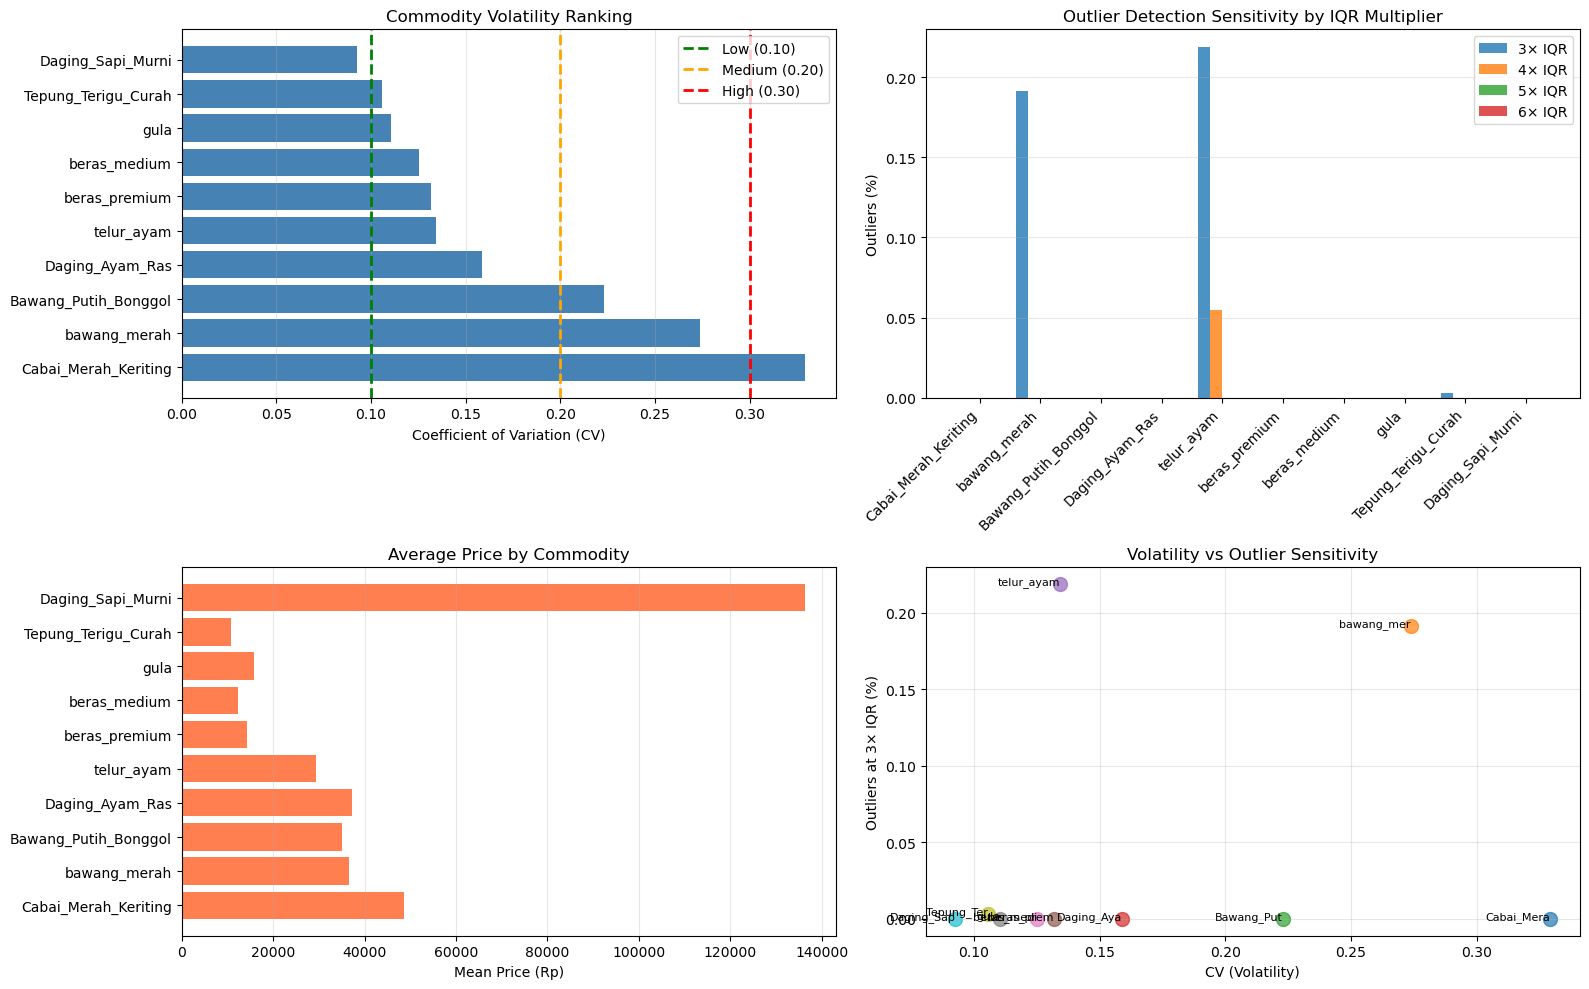

In [28]:
# ============================================
# 3. VISUALIZE COMMODITY CHARACTERISTICS
# ============================================

print("\n" + "="*70)
print("PART 2: VISUALIZATION")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: CV Distribution
axes[0, 0].barh(df_commodity['commodity'], df_commodity['cv'], color='steelblue')
axes[0, 0].axvline(0.10, color='green', linestyle='--', label='Low (0.10)', linewidth=2)
axes[0, 0].axvline(0.20, color='orange', linestyle='--', label='Medium (0.20)', linewidth=2)
axes[0, 0].axvline(0.30, color='red', linestyle='--', label='High (0.30)', linewidth=2)
axes[0, 0].set_xlabel('Coefficient of Variation (CV)')
axes[0, 0].set_title('Commodity Volatility Ranking')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Plot 2: Outlier Sensitivity (comparing thresholds)
x = np.arange(len(df_commodity))
width = 0.2

axes[0, 1].bar(x - 1.5*width, df_commodity['outliers_3x_pct'], width, label='3× IQR', alpha=0.8)
axes[0, 1].bar(x - 0.5*width, df_commodity['outliers_4x_pct'], width, label='4× IQR', alpha=0.8)
axes[0, 1].bar(x + 0.5*width, df_commodity['outliers_5x_pct'], width, label='5× IQR', alpha=0.8)
axes[0, 1].bar(x + 1.5*width, df_commodity['outliers_6x_pct'], width, label='6× IQR', alpha=0.8)

axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(df_commodity['commodity'], rotation=45, ha='right')
axes[0, 1].set_ylabel('Outliers (%)')
axes[0, 1].set_title('Outlier Detection Sensitivity by IQR Multiplier')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Mean Price Range
axes[1, 0].barh(df_commodity['commodity'], df_commodity['mean'], color='coral')
axes[1, 0].set_xlabel('Mean Price (Rp)')
axes[1, 0].set_title('Average Price by Commodity')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Plot 4: CV vs Outlier Percentage (3× IQR)
for i, row in df_commodity.iterrows():
    axes[1, 1].scatter(row['cv'], row['outliers_3x_pct'], s=100, alpha=0.7)
    axes[1, 1].text(row['cv'], row['outliers_3x_pct'], 
                    row['commodity'][:10], fontsize=8, ha='right')

axes[1, 1].set_xlabel('CV (Volatility)')
axes[1, 1].set_ylabel('Outliers at 3× IQR (%)')
axes[1, 1].set_title('Volatility vs Outlier Sensitivity')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
recommendations = []

for _, row in df_commodity.iterrows():
    commodity = row['commodity']
    cv = row['cv']
    outliers_3x_pct = row['outliers_3x_pct']
    outliers_6x_pct = row['outliers_6x_pct']
    
    # Decision logic
    if cv < 0.10:
        iqr_mult = 3.0
        interp_limit = 40
        strategy = "conservative"
        reason = "Very stable" # Very stable, strict outlier removal safe
    elif cv < 0.15:
        iqr_mult = 4.0
        interp_limit = 35
        strategy = "moderate"
        reason = "L moderateV" #  vLow-moderate volatility
    elif cv < 0.20:
        iqr_mult = 4.5
        interp_limit = 30
        strategy = "moderate-relaxed"
        reason = "Moderate volatility" # Moderate volatility, balance needed
    elif cv < 0.30:
        iqr_mult = 5.0
        interp_limit = 20
        strategy = "relaxed"
        reason = "H volatility" # High volatility, preserve spikes
    else:
        # Extra check: if extreme outliers are many, be even more lenient
        if outliers_6x_pct > 5:  # >5% still outliers at 6× IQR
            iqr_mult = 7.0
            interp_limit = 10
            strategy = "very_relaxed"
            reason = "Extreme volatility + many natural spikes"
        else:
            iqr_mult = 6.0
            interp_limit = 15
            strategy = "very_relaxed"
            reason = "VH volatility" # Very high volatility
    
    # Estimate outliers to be removed
    outliers_removed_pct = row[f'outliers_{int(iqr_mult)}x_pct']
    
    recommendations.append({
        'commodity': commodity,
        'cv': cv,
        'iqr_multiplier': iqr_mult,
        'interp_limit': interp_limit,
        'strategy': strategy,
        'outliers_removed_pct': outliers_removed_pct,
        'reason': reason
    })

df_recommendations = pd.DataFrame(recommendations).sort_values('cv', ascending=False)

print("\n🎯 RECOMMENDED CLEANING PARAMETERS:")
print(df_recommendations.to_string(index=False))




🎯 RECOMMENDED CLEANING PARAMETERS:
           commodity       cv  iqr_multiplier  interp_limit         strategy  outliers_removed_pct              reason
Cabai_Merah_Keriting 0.329213             6.0            15     very_relaxed               0.00000       VH volatility
        bawang_merah 0.273676             5.0            20          relaxed               0.00000        H volatility
Bawang_Putih_Bonggol 0.222945             5.0            20          relaxed               0.00000        H volatility
     Daging_Ayam_Ras 0.158805             4.5            30 moderate-relaxed               0.00000 Moderate volatility
          telur_ayam 0.134344             4.0            35         moderate               0.05472         L moderateV
       beras_premium 0.131809             4.0            35         moderate               0.00000         L moderateV
        beras_medium 0.125122             4.0            35         moderate               0.00000         L moderateV
            

### Analisis 
Berdasarkan seluruh hasil Exploratory Data Analysis (EDA), termasuk analisis volatilitas harga, proporsi outlier, pola missing value, serta visualisasi seri waktu sebelum dan sesudah pembersihan, keputusan yang diambil adalah menggunakan pendekatan *adaptive data cleaning* untuk setiap komoditas. Hal ini diperlukan karena setiap komoditas memiliki karakteristik volatilitas yang berbeda, sehingga pendekatan pembersihan yang seragam (misalnya menggunakan 3×IQR dan interpolasi linear 40 hari untuk semua komoditas) terbukti tidak memadai dan bahkan berpotensi merusak struktur data, terutama pada komoditas yang memiliki pola harga sangat fluktuatif. Hasil evaluasi menunjukkan bahwa metode cleaning global menyebabkan penurunan standar deviasi hingga 70–76% pada komoditas tertentu, menandakan terjadinya *over-smoothing* dan hilangnya informasi penting mengenai dinamika pasar.

Untuk komoditas dengan volatilitas tinggi seperti Cabai Merah dan Bawang Merah, nilai ekstrem (spikes) merupakan bagian alami dari pola harga dan tidak boleh dihapus menggunakan threshold yang terlalu ketat. Oleh karena itu, threshold outlier diperluas menjadi 5×–6×IQR dan batas interpolasi dipersempit agar tidak menghaluskan pola shock musiman yang penting. Sebaliknya, untuk komoditas stabil seperti Beras, Gula, dan Tepung Terigu, pendekatan yang lebih konservatif tetap aman digunakan karena volatilitasnya rendah dan data cenderung lebih bersih. Parameter adaptif juga disesuaikan untuk komoditas dengan volatilitas moderat seperti Telur Ayam, Minyak Kemasan, dan Daging Ayam, di mana dibutuhkan keseimbangan antara menjaga sinyal pasar dan mengurangi noise teknis.

Pendekatan adaptif ini memastikan bahwa cleaning yang dilakukan tidak menghilangkan pola volatilitas yang justru menjadi indikator penting dalam identifikasi provinsi rawan krisis pangan. Karena penelitian ini menggunakan algoritma Fuzzy C-Means (FCM) untuk segmentasi provinsi berdasarkan pola harga komoditas, menjaga bentuk kurva asli dan variabilitas data menjadi sangat penting. FCM sensitif terhadap bentuk time-series, sehingga *over-smoothing* dapat mengakibatkan hilangnya informasi mengenai instabilitas harga yang relevan secara kebijakan. Oleh sebab itu, strategi adaptive cleaning dipilih agar data tetap representatif, sekaligus menjaga interpretabilitas hasil clustering. Pendekatan ini memberikan keseimbangan optimal antara *noise reduction* dan *signal preservation*, sehingga hasil akhir lebih stabil, realistis, dan sesuai dengan tujuan analisis kerawanan pangan.

#### Summry Cleaning

Berikut adalah parameter pembersihan data yang ditetapkan berdasarkan hasil EDA menyeluruh, analisis volatilitas, distribusi outlier, serta evaluasi visualisasi sebelum–sesudah cleaning.

| Komoditas                     | CV    | CV_std  | Outliers (3×) | Recommended IQR | Interp Limit | Alasan Revisi                                                                 |
|------------------------------|-------|---------|----------------|------------------|--------------|-------------------------------------------------------------------------------|
| Cabai Merah                  | 0.33  | 0.082   | 0.0%           | 6×               | 15 hari      | Sangat volatil; spike alami, tidak boleh dilabeli outlier                     |
| Bawang Merah                 | 0.27  | 0.041   | 0.2%           | 5×               | 20 hari      | Volatilitas tinggi, perlu menjaga pola lonjakan harga                         |
| Bawang Putih                 | 0.22  | 0.029   | 0.0%           | 5×               | 20 hari      | Volatilitas moderat-tinggi; threshold longgar diperlukan                      |
| Telur Ayam                   | 0.13  | 0.014   | 0.22%          | 4×               | 30 hari      | Volatilitas moderat; IQR 4× cukup aman                                        |
| Daging Ayam                  | 0.16  | 0.022   | 0.0%           | 4.5×             | 30 hari      | Volatilitas moderat; perlu keseimbangan smoothing vs signal                   |
| Beras Premium                | 0.13  | 0.022   | 0.0%           | 4×               | 35 hari      | Stabil; smoothing panjang aman                                                |
| Beras Medium                 | 0.13  | 0.025   | 0.0%           | 4×               | 35 hari      | Stabil; jarang terdapat lonjakan signifikan                                   |
| Gula                         | 0.11  | 0.008   | 0.0%           | 4×               | 35 hari      | Sangat stabil; threshold longgar tidak diperlukan                              |
| Tepung Terigu                | 0.11  | 0.015   | 0.003%         | 4×               | 35 hari      | Sangat stabil; hampir tidak ada outlier                                       |
| Daging Sapi                  | 0.09  | 0.010   | 0.0%           | 4× ⬇             | 35 hari      | Stabil; IQR 3× terlalu ketat, 6× terlalu longgar — 4× adalah titik optimal    |


## **data cleaning (handle outlier + missing)**

In [30]:
# Parameter cleaning adaptif berdasarkan hasil EDA
cleaning_params = {
    'Cabai_Merah_Keriting': {'iqr_mult': 6.0, 'interp_limit': 15},
    'Bawang_Merah': {'iqr_mult': 5.0, 'interp_limit': 20},
    'Bawang_Putih_Bonggol': {'iqr_mult': 5.0, 'interp_limit': 20},
    'Telur_Ayam': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Daging_Ayam_Ras': {'iqr_mult': 4.5, 'interp_limit': 30},
    'Beras_Premium': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Beras_Medium': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Gula': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Tepung_Terigu_Curah': {'iqr_mult': 4.0, 'interp_limit': 35},
    'Daging_Sapi_Murni': {'iqr_mult': 3.0, 'interp_limit': 40}
}

In [31]:
data_cleaned = {}

for commodity, df in data.items():

    print(f"\nCleaning {commodity}...")

    # Ambil parameter adaptif komoditas
    params = cleaning_params.get(commodity, {'iqr_mult': 4.0, 'interp_limit': 30})
    iqr_mult = params['iqr_mult']
    interp_limit = params['interp_limit']

    print(f"  IQR multiplier = {iqr_mult}")
    print(f"  Interpolation limit = {interp_limit} days")

    df_clean = df.copy()
    province_cols = [col for col in df.columns if col != "Date"]

    # Loop kolom per provinsi
    for col in province_cols:

        series = df_clean[col].copy()

        # -------------------------------
        # 1. OUTLIER REMOVAL (IQR ADAPTIF)
        # -------------------------------
        valid = series.dropna()
        if len(valid) > 0:
            Q1 = valid.quantile(0.25)
            Q3 = valid.quantile(0.75)
            IQR = Q3 - Q1

            lower = Q1 - (iqr_mult * IQR)
            upper = Q3 + (iqr_mult * IQR)

            # Set outlier menjadi NaN
            series[(series < lower) | (series > upper)] = np.nan

        # -------------------------------
        # 2. INTERPOLASI (LIMIT ADAPTIF)
        # -------------------------------
        series = series.interpolate(
            method='linear',
            limit=interp_limit,
            limit_direction='both'
        )

        df_clean[col] = series

    # Simpan hasil cleaning
    data_cleaned[commodity] = df_clean

    # Summary missing count
    missing_before = df.isnull().sum().sum()
    missing_after = df_clean.isnull().sum().sum()
    print(f"  Missing values: {missing_before} → {missing_after}")


print("\n✓ Adaptive cleaning completed for all commodities!")




Cleaning bawang_merah...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning beras_medium...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning beras_premium...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning telur_ayam...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning gula...
  IQR multiplier = 4.0
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning Bawang_Putih_Bonggol...
  IQR multiplier = 5.0
  Interpolation limit = 20 days
  Missing values: 1241 → 0

Cleaning Cabai_Merah_Keriting...
  IQR multiplier = 6.0
  Interpolation limit = 15 days
  Missing values: 1244 → 140

Cleaning Daging_Ayam_Ras...
  IQR multiplier = 4.5
  Interpolation limit = 30 days
  Missing values: 1241 → 0

Cleaning Daging_Sapi_Murni...
  IQR multiplier = 3.0
  Interpolation limit = 40 days
  Missing values: 1245 → 459

Cleaning

In [32]:
output_path = "path/to/output/cleaned/"  # Sesuaikan path output
os.makedirs(output_path, exist_ok=True)

for commodity, df in data_cleaned.items():
    output_file = os.path.join(output_path, f"{commodity}_cleaned.csv")
    df.to_csv(output_file, index=False)
    print(f"Saved: {output_file}")

print("\n✓ All cleaned files saved successfully!")

Saved: path/to/output/cleaned/bawang_merah_cleaned.csv
Saved: path/to/output/cleaned/beras_medium_cleaned.csv
Saved: path/to/output/cleaned/beras_premium_cleaned.csv
Saved: path/to/output/cleaned/telur_ayam_cleaned.csv
Saved: path/to/output/cleaned/gula_cleaned.csv
Saved: path/to/output/cleaned/Bawang_Putih_Bonggol_cleaned.csv
Saved: path/to/output/cleaned/Cabai_Merah_Keriting_cleaned.csv
Saved: path/to/output/cleaned/Daging_Ayam_Ras_cleaned.csv
Saved: path/to/output/cleaned/Daging_Sapi_Murni_cleaned.csv
Saved: path/to/output/cleaned/Tepung_Terigu_Curah_cleaned.csv

✓ All cleaned files saved successfully!


### Benchmark sebelum dan sesudah clean
read [this](Benchmark_AfterClean.ipynb)

**Summary Hasil Cleaning**

| Komoditas       | Missing After | Status               | Aksi   |
| --------------- | ------------- | -------------------- | ------ |
| Bawang Merah    | 0 ✓           | Perfect              | KEEP   |
| Beras Medium    | 0 ✓           | Perfect              | KEEP   |
| Beras Premium   | 0 ✓           | Perfect              | KEEP   |
| Telur Ayam      | 0 ✓           | Perfect              | KEEP   |
| Gula            | 0 ✓           | Perfect              | KEEP   |
| Bawang Putih    | 0 ✓           | Perfect              | KEEP   |
| Cabai Merah     | 140           | Good (85% valid)     | KEEP   |
| Daging Ayam Ras | 0 ✓           | Perfect              | KEEP   |
| Daging Sapi     | 459           | Moderate (53% valid) | KEEP   |
| Tepung Terigu   | 0 ✓           | Perfect              | KEEP   |



## **Feature Extraction**
Fuzzy C-Means tidak bisa langsung membaca data,algoritma ini membutuhkan feature untuk melakukan clustering(pengelompokkan)

In [33]:
DATA_CLEANED_PATH = 'path/to/output/cleaned'
OUTPUT_PATH = '/home/kali/AI/'
MIN_VALID_POINTS = 100

# ✅ FIXED: Menggunakan nama variabel yang konsisten
commodities = [
    'bawang_merah',                           # ← lowercase!
    'Bawang_Putih_Bonggol',                   
    'beras_medium',                           # ← lowercase!
    'beras_premium',                          # ← lowercase!
    'Cabai_Merah_Keriting',                   
    'Daging_Ayam_Ras',                        
    'Daging_Sapi_Murni',                      
    'gula',                                   # ← bukan Gula_Pasir_Lokal!
    'telur_ayam',                             # ← bukan Telur_Ayam_Ras!
    'Tepung_Terigu_Curah'                     
]
print("="*80)
print("CONFIGURATION")
print("="*80)
print(f"MIN_VALID_POINTS threshold: {MIN_VALID_POINTS} (~{MIN_VALID_POINTS/1004*100:.1f}% of data)")


CONFIGURATION
MIN_VALID_POINTS threshold: 100 (~10.0% of data)


In [34]:
print("\n" + "="*80)
print("LOADING CLEANED DATA")
print("="*80)

data_cleaned = {}
loading_errors = []

for commodity in commodities:
    filename = f"{commodity}_cleaned.csv"
    filepath = os.path.join(DATA_CLEANED_PATH, filename)
    
    if os.path.exists(filepath):
        try:
            df = pd.read_csv(filepath, parse_dates=['Date'])
            data_cleaned[commodity] = df
            
            rows, cols = df.shape
            missing_pct = (df.drop('Date', axis=1).isnull().sum().sum() / 
                          df.drop('Date', axis=1).size) * 100
            
            print(f"✅ {commodity:40s} | Shape: {rows:4d} × {cols:2d} | Missing: {missing_pct:5.2f}%")
        except Exception as e:
            loading_errors.append({'commodity': commodity, 'error': str(e)})
            print(f"❌ ERROR loading {commodity}: {str(e)}")
    else:
        loading_errors.append({'commodity': commodity, 'error': 'File not found'})
        print(f"❌ NOT FOUND: {filepath}")



LOADING CLEANED DATA
✅ bawang_merah                             | Shape: 1004 × 35 | Missing:  0.00%
✅ Bawang_Putih_Bonggol                     | Shape: 1004 × 35 | Missing:  0.00%
✅ beras_medium                             | Shape: 1004 × 35 | Missing:  0.00%
✅ beras_premium                            | Shape: 1004 × 35 | Missing:  0.00%
✅ Cabai_Merah_Keriting                     | Shape: 1004 × 35 | Missing:  0.41%
✅ Daging_Ayam_Ras                          | Shape: 1004 × 35 | Missing:  0.00%
✅ Daging_Sapi_Murni                        | Shape: 1004 × 35 | Missing:  1.34%
✅ gula                                     | Shape: 1004 × 35 | Missing:  0.00%
✅ telur_ayam                               | Shape: 1004 × 35 | Missing:  0.00%
✅ Tepung_Terigu_Curah                      | Shape: 1004 × 35 | Missing:  0.00%


In [35]:
print(f"\n{'='*80}")
print(f"✅ Successfully loaded: {len(data_cleaned)} / {len(commodities)} commodities")
if loading_errors:
    print(f"❌ Failed to load: {len(loading_errors)} commodities")
    for err in loading_errors:
        print(f"   - {err['commodity']}: {err['error']}")
else:
    print("✅ All commodities loaded successfully!")

# Stop if no data loaded
if len(data_cleaned) == 0:
    raise Exception("❌ CRITICAL: No data loaded! Check your DATA_CLEANED_PATH")



✅ Successfully loaded: 10 / 10 commodities
✅ All commodities loaded successfully!


In [36]:
print("\n" + "="*80)
print("FEATURE EXTRACTION: 5 STATISTICAL FEATURES")
print("="*80)
print("Features: Mean, CV, Trend_Slope, Autocorr, Skewness\n")

features = []
skipped = []
low_confidence = []

for commodity, df in data_cleaned.items():
    print(f"\nProcessing: {commodity}")
    
    province_count = 0
    for col in df.columns:
        if col == 'Date':
            continue
        
        series = df[col].dropna()
        valid_count = len(series)
        total_count = len(df)
        valid_pct = (valid_count / total_count) * 100
        
        # Check threshold
        if valid_count < MIN_VALID_POINTS:
            skipped.append({
                'Commodity': commodity,
                'Province': col,
                'Valid_Count': valid_count,
                'Valid_Pct': valid_pct,
                'Reason': f'Below threshold ({MIN_VALID_POINTS} points)'
            })
            print(f"  ⚠️ SKIP: {col} (only {valid_count}/{total_count} valid = {valid_pct:.1f}%)")
            continue
        
        # Confidence level
        if valid_pct >= 80:
            confidence = 'High'
        elif valid_pct >= 50:
            confidence = 'Medium'
        else:
            confidence = 'Low'
        
        if confidence != 'High':
            low_confidence.append({
                'Commodity': commodity,
                'Province': col,
                'Valid_Pct': valid_pct,
                'Confidence': confidence
            })
        
        # =====================================================================
        # FEATURE EXTRACTION
        # =====================================================================
        
        # 1. MEAN (Price Level)
        mean_price = series.mean()
        
        # 2. CV (Coefficient of Variation)
        std_price = series.std()
        cv = std_price / mean_price if mean_price > 0 else 0
        
        # 3. TREND_SLOPE (Normalized)
        x = np.arange(len(series))
        y = series.values
        if len(x) > 1:
            slope = np.polyfit(x, y, 1)[0]
            trend_slope = slope / mean_price if mean_price > 0 else 0
        else:
            trend_slope = 0
        
        # 4. AUTOCORR (Lag 1)
        if len(series) > 2:
            autocorr = series.autocorr(lag=1)
            autocorr = 0 if np.isnan(autocorr) else autocorr
        else:
            autocorr = 0
        
        # 5. SKEWNESS
        if len(series) > 3:
            skewness = stats.skew(series.values)
            skewness = 0 if np.isnan(skewness) else skewness
        else:
            skewness = 0
        
        features.append({
            'Province': col,
            'Commodity': commodity,
            'Mean': mean_price,
            'CV': cv,
            'Trend_Slope': trend_slope,
            'Autocorr': autocorr,
            'Skewness': skewness,
            'Valid_Count': valid_count,
            'Valid_Pct': valid_pct,
            'Confidence': confidence
        })
        province_count += 1
    
    print(f"  ✅ Extracted features for {province_count} provinces")

df_features = pd.DataFrame(features)
df_skipped = pd.DataFrame(skipped)
df_low_conf = pd.DataFrame(low_confidence)

print(f"\n{'='*80}")
print(f"✅ Total features extracted: {len(df_features)}")
print(f"⚠️ Skipped (below threshold): {len(df_skipped)}")
print(f"⚠️ Low/Medium confidence: {len(df_low_conf)}")




FEATURE EXTRACTION: 5 STATISTICAL FEATURES
Features: Mean, CV, Trend_Slope, Autocorr, Skewness


Processing: bawang_merah
  ✅ Extracted features for 34 provinces

Processing: Bawang_Putih_Bonggol
  ✅ Extracted features for 34 provinces

Processing: beras_medium
  ✅ Extracted features for 34 provinces

Processing: beras_premium
  ✅ Extracted features for 34 provinces

Processing: Cabai_Merah_Keriting
  ✅ Extracted features for 34 provinces

Processing: Daging_Ayam_Ras
  ✅ Extracted features for 34 provinces

Processing: Daging_Sapi_Murni
  ✅ Extracted features for 34 provinces

Processing: gula
  ✅ Extracted features for 34 provinces

Processing: telur_ayam
  ✅ Extracted features for 34 provinces

Processing: Tepung_Terigu_Curah
  ✅ Extracted features for 34 provinces

✅ Total features extracted: 340
⚠️ Skipped (below threshold): 0
⚠️ Low/Medium confidence: 0


In [37]:
print("\n" + "="*80)
print("TRANSFORMING TO WIDE FORMAT FOR FCM")
print("="*80)

pivot_mean = df_features.pivot(index='Province', columns='Commodity', values='Mean').add_prefix('Mean_')
pivot_cv = df_features.pivot(index='Province', columns='Commodity', values='CV').add_prefix('CV_')
pivot_trend = df_features.pivot(index='Province', columns='Commodity', values='Trend_Slope').add_prefix('Trend_')
pivot_autocorr = df_features.pivot(index='Province', columns='Commodity', values='Autocorr').add_prefix('Autocorr_')
pivot_skewness = df_features.pivot(index='Province', columns='Commodity', values='Skewness').add_prefix('Skewness_')

df_fcm_features = pd.concat([
    pivot_mean, 
    pivot_cv, 
    pivot_trend, 
    pivot_autocorr, 
    pivot_skewness
], axis=1)

num_commodities = len(data_cleaned)
num_features = 5
expected_features = num_commodities * num_features

print(f"✅ Feature matrix shape: {df_fcm_features.shape}")
print(f"✅ Expected: ({df_fcm_features.shape[0]} provinces, {expected_features} features)")
print(f"   [{num_commodities} commodities × {num_features} features = {expected_features}]")




TRANSFORMING TO WIDE FORMAT FOR FCM
✅ Feature matrix shape: (34, 50)
✅ Expected: (34 provinces, 50 features)
   [10 commodities × 5 features = 50]


In [38]:
# Check for missing values
missing_in_matrix = df_fcm_features.isnull().sum().sum()
if missing_in_matrix > 0:
    print(f"\n⚠️ WARNING: {missing_in_matrix} NaN values in feature matrix")
    print("\nColumns with NaN:")
    nan_cols = df_fcm_features.columns[df_fcm_features.isnull().any()].tolist()
    for col in nan_cols:
        nan_count = df_fcm_features[col].isnull().sum()
        print(f"  - {col}: {nan_count} NaN values")
else:
    print("\n✅ No missing values in feature matrix")




✅ No missing values in feature matrix


In [39]:
print("\n" + "="*80)
print("FEATURE SUMMARY STATISTICS")
print("="*80)

print("\n1. MEAN PRICES per commodity:")
print("-" * 60)
mean_cols = [col for col in df_fcm_features.columns if col.startswith('Mean_')]
for col in sorted(mean_cols):
    commodity_name = col.replace('Mean_', '')
    mean_val = df_fcm_features[col].mean()
    min_val = df_fcm_features[col].min()
    max_val = df_fcm_features[col].max()
    print(f"  {commodity_name:40s} | Rp {mean_val:8,.0f} | Range: Rp {min_val:8,.0f} - Rp {max_val:8,.0f}")

print("\n2. VOLATILITY (CV) per commodity:")
print("-" * 60)
cv_cols = [col for col in df_fcm_features.columns if col.startswith('CV_')]
for col in sorted(cv_cols):
    commodity_name = col.replace('CV_', '')
    mean_cv = df_fcm_features[col].mean()
    min_cv = df_fcm_features[col].min()
    max_cv = df_fcm_features[col].max()
    
    if mean_cv > 0.25:
        category = "Very High"
    elif mean_cv > 0.15:
        category = "High"
    elif mean_cv > 0.10:
        category = "Moderate"
    else:
        category = "Low"
    
    print(f"  {commodity_name:40s} | CV: {mean_cv:.3f} | Range: {min_cv:.3f} - {max_cv:.3f} | [{category}]")




FEATURE SUMMARY STATISTICS

1. MEAN PRICES per commodity:
------------------------------------------------------------
  Bawang_Putih_Bonggol                     | Rp   34,946 | Range: Rp   28,664 - Rp   48,534
  Cabai_Merah_Keriting                     | Rp   49,417 | Range: Rp   34,116 - Rp   69,142
  Daging_Ayam_Ras                          | Rp   37,275 | Range: Rp   27,690 - Rp   48,281
  Daging_Sapi_Murni                        | Rp  136,550 | Range: Rp  113,471 - Rp  159,027
  Tepung_Terigu_Curah                      | Rp   10,746 | Range: Rp    9,503 - Rp   12,914
  bawang_merah                             | Rp   37,155 | Range: Rp   28,714 - Rp   56,893
  beras_medium                             | Rp   12,351 | Range: Rp   11,177 - Rp   14,156
  beras_premium                            | Rp   14,127 | Range: Rp   12,678 - Rp   16,422
  gula                                     | Rp   15,707 | Range: Rp   14,468 - Rp   17,521
  telur_ayam                               | Rp   29

### Validation Feature extraction

In [40]:
df = pd.read_csv('/home/kali/AI/fcm_features_raw.csv', index_col=0) 

In [42]:
feature_types = {
    'Mean': [c for c in df.columns if c.startswith('Mean_')],
    'CV': [c for c in df.columns if c.startswith('CV_')],
    'Trend': [c for c in df.columns if c.startswith('Trend_')],
    'Autocorr': [c for c in df.columns if c.startswith('Autocorr_') or c.startswith('AC_')],
    'Skewness': [c for c in df.columns if c.startswith('Skew')]
}

print("\nStatistics per feature type:")
print("-" * 80)
print(f"{'Type':12s} | {'Count':5s} | {'Mean Var':10s} | {'Mean |Corr|':12s} | {'Assessment':20s}")
print("-" * 80)

for ftype, cols in feature_types.items():
    if len(cols) == 0:
        continue
    
    # Variance
    mean_var = df[cols].var().mean()
    
    # Internal correlation (within same feature type across commodities)
    internal_corr = df[cols].corr().abs().values
    mean_internal_corr = internal_corr[np.triu_indices_from(internal_corr, k=1)].mean()
    
    # Assessment
    if mean_var < 0.01:
        assessment = "⚠️ LOW VARIANCE"
    elif mean_internal_corr > 0.7:
        assessment = "⚠️ HIGH REDUNDANCY"
    else:
        assessment = "✓ Good"
    
    print(f"{ftype:12s} | {len(cols):5d} | {mean_var:10.4f} | {mean_internal_corr:12.4f} | {assessment:20s}")





Statistics per feature type:
--------------------------------------------------------------------------------
Type         | Count | Mean Var   | Mean |Corr|  | Assessment          
--------------------------------------------------------------------------------
Mean         |    10 | 35524159.0449 |       0.6149 | ✓ Good              
CV           |    10 |     0.0013 |       0.3033 | ⚠️ LOW VARIANCE     
Trend        |    10 |     0.0000 |       0.1966 | ⚠️ LOW VARIANCE     
Autocorr     |    10 |     0.0025 |       0.5992 | ⚠️ LOW VARIANCE     
Skewness     |    10 |     0.1557 |       0.1769 | ✓ Good              



GENERATING FEATURE CORRELATION HEATMAP


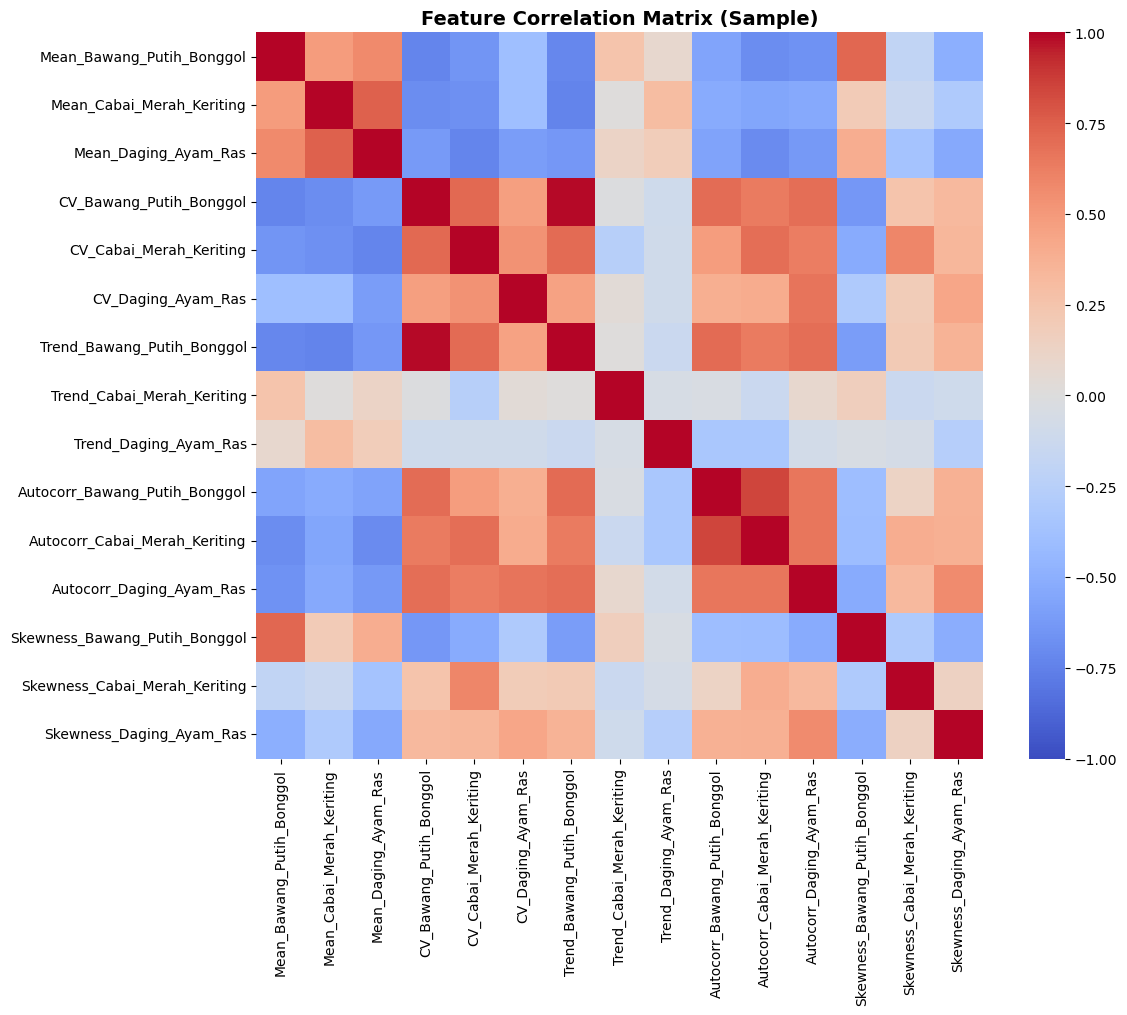


✅ FEATURE VALIDATION COMPLETE!


In [44]:
print("\n" + "="*80)
print("GENERATING FEATURE CORRELATION HEATMAP")
print("="*80)

# Sample features for visualization (avoid huge heatmap)
sample_cols = []
for ftype, cols in feature_types.items():
    sample_cols.extend(cols[:3])  # First 3 commodities per type

if len(sample_cols) > 0:
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(df[sample_cols].corr(), annot=False, cmap='coolwarm', 
                center=0, vmin=-1, vmax=1, square=True, ax=ax)
    ax.set_title('Feature Correlation Matrix (Sample)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n" + "="*80)
print("✅ FEATURE VALIDATION COMPLETE!")
print("="*80)

## 3.4 Feature Extraction
Feature
### 3.4.1 Rationale
Fuzzy C-Means (FCM) clustering memerlukan input berupa **feature matrix**, 
bukan raw time-series data. Oleh karena itu, dilakukan **feature extraction** 
untuk mengubah time-series harga komoditas (959 hari × 34 provinsi × 10 komoditas) 
menjadi **statistical features** yang merepresentasikan karakteristik harga 
di setiap provinsi.


Untuk Melihat hasil validasi lebih detail : [validation](validation_feature.ipynb)


## **Normalization**
Fuzzy C-Means menggunakan jarak Euclidean sebagai dasar untuk menghitung:

- derajat keanggotaan (membership)

- pembaruan centroid

- fungsi objektif 

Karena jarak Euclidean sensitif terhadap skala fitur, maka fitur dengan rentang nilai yang lebih besar akan mendominasi clustering.maka dari itu kita membutuhkan normalisasi data dan pilihannya paling tepat adalah z-score dikarenakan data kita miliki punya sebaran yang berbeda dan tidak berada pada rentang yang sama dikarenakan proses cleaning yang kita lakukan berbeda untuk setiap komoditas

In [45]:
print("\n" + "="*80)
print("LOADING RAW FEATURES")
print("="*80)

input_file = '/home/kali/AI/fcm_features_raw.csv'
output_file = '/home/kali/AI/fcm_features_standardized.csv'

df_raw = pd.read_csv(input_file, index_col=0)  # index_col=0 → Province as index

print(f"✓ Loaded: {input_file}")
print(f"  Shape: {df_raw.shape}")
print(f"  Provinces: {len(df_raw)}")
print(f"  Features: {len(df_raw.columns)}")


LOADING RAW FEATURES
✓ Loaded: /home/kali/AI/fcm_features_raw.csv
  Shape: (34, 50)
  Provinces: 34
  Features: 50


In [46]:
print("\n" + "="*80)
print("DATA VALIDATION")
print("="*80)

missing_count = df_raw.isnull().sum().sum()
if missing_count > 0:
    print(f"⚠️ WARNING: {missing_count} missing values found!")
    print("\nProvinces with missing:")
    print(df_raw.isnull().sum(axis=1)[df_raw.isnull().sum(axis=1) > 0])
    
    print("\nFeatures with missing:")
    missing_features = df_raw.isnull().sum()
    print(missing_features[missing_features > 0])
    
    # Handle missing (impute with column mean)
    print("\n⚠️ Filling missing values with column mean...")
    df_raw = df_raw.fillna(df_raw.mean())
    print("✓ Missing values filled")
else:
    print("✓ No missing values")

# Check for infinite values
inf_count = np.isinf(df_raw.values).sum()
if inf_count > 0:
    print(f"⚠️ WARNING: {inf_count} infinite values found!")
    df_raw = df_raw.replace([np.inf, -np.inf], np.nan).fillna(df_raw.mean())
    print("✓ Infinite values replaced with column mean")
else:
    print("✓ No infinite values")



DATA VALIDATION
✓ No missing values
✓ No infinite values


In [47]:
print("\n" + "="*80)
print("STATISTICS BEFORE STANDARDIZATION")
print("="*80)

print("\nFeature ranges (sample - showing different commodity types):")
print("-" * 80)

# Sample features from different types
sample_features = [
    'Mean_bawang_merah',      # High volatility vegetable
    'Mean_cabai_merah',       # Very high volatility
    'Mean_daging_sapi',       # Low volatility, high price
    'Mean_tepung_terigu',     # Low volatility, low price
    'CV_bawang_merah',        # Volatility metric
    'CV_daging_sapi',         # Volatility metric
    'Std_bawang_merah',       # Absolute volatility
    'Std_daging_sapi'         # Absolute volatility
]

# Adjust feature names based on actual columns
sample_features = [f for f in sample_features if f in df_raw.columns]

# Add any actual column if sample not found
if len(sample_features) < 6:
    sample_features = df_raw.columns[:8].tolist()

for feature in sample_features:
    min_val = df_raw[feature].min()
    max_val = df_raw[feature].max()
    mean_val = df_raw[feature].mean()
    std_val = df_raw[feature].std()
    range_val = max_val - min_val
    
    print(f"{feature[:35]:35s} | Mean: {mean_val:10,.2f} | Std: {std_val:10,.2f} | Range: {range_val:10,.2f}")

print("\nOverall statistics:")
print(f"  Mean of all features: {df_raw.mean().mean():,.2f}")
print(f"  Std of all features:  {df_raw.std().mean():,.2f}")
print(f"  Min value overall:    {df_raw.min().min():,.2f}")
print(f"  Max value overall:    {df_raw.max().max():,.2f}")



STATISTICS BEFORE STANDARDIZATION

Feature ranges (sample - showing different commodity types):
--------------------------------------------------------------------------------
Mean_Bawang_Putih_Bonggol           | Mean:  34,946.02 | Std:   5,190.07 | Range:  19,869.63
Mean_Cabai_Merah_Keriting           | Mean:  49,416.78 | Std:   9,485.71 | Range:  35,025.80
Mean_Daging_Ayam_Ras                | Mean:  37,274.56 | Std:   5,505.40 | Range:  20,590.64
Mean_Daging_Sapi_Murni              | Mean: 136,550.49 | Std:  12,100.57 | Range:  45,556.46
Mean_Tepung_Terigu_Curah            | Mean:  10,745.95 | Std:     864.99 | Range:   3,411.39
Mean_bawang_merah                   | Mean:  37,154.89 | Std:   6,854.18 | Range:  28,178.75
Mean_beras_medium                   | Mean:  12,351.29 | Std:     937.75 | Range:   2,979.09
Mean_beras_premium                  | Mean:  14,126.90 | Std:   1,238.50 | Range:   3,744.72

Overall statistics:
  Mean of all features: 7,552.84
  Std of all features:  

In [48]:
print("\n" + "="*80)
print("APPLYING Z-SCORE STANDARDIZATION")
print("="*80)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
features_standardized = scaler.fit_transform(df_raw)

# Convert back to DataFrame (preserve index and columns)
df_standardized = pd.DataFrame(
    features_standardized,
    index=df_raw.index,
    columns=df_raw.columns
)

print("✓ Standardization complete")
print(f"  All features transformed to Z-scores (mean=0, std=1)")



APPLYING Z-SCORE STANDARDIZATION
✓ Standardization complete
  All features transformed to Z-scores (mean=0, std=1)


### Validasi Hasil normalisasi

In [49]:
print("\n" + "="*80)
print("STATISTICS AFTER STANDARDIZATION")
print("="*80)

print("\nFeature Z-score ranges (sample):")
print("-" * 80)

for feature in sample_features:
    min_val = df_standardized[feature].min()
    max_val = df_standardized[feature].max()
    mean_val = df_standardized[feature].mean()
    std_val = df_standardized[feature].std()
    range_val = max_val - min_val
    
    print(f"{feature[:35]:35s} | Mean: {mean_val:7.4f} | Std: {std_val:6.4f} | Range: [{min_val:6.2f}, {max_val:6.2f}]")

print("\nOverall statistics:")
print(f"  Mean of all features:  {df_standardized.mean().mean():8.6f}  (should be ~0)")
print(f"  Std of all features:   {df_standardized.std().mean():8.6f}  (should be ~1)")
print(f"  Min Z-score overall:   {df_standardized.min().min():8.3f}")
print(f"  Max Z-score overall:   {df_standardized.max().max():8.3f}")



STATISTICS AFTER STANDARDIZATION

Feature Z-score ranges (sample):
--------------------------------------------------------------------------------
Mean_Bawang_Putih_Bonggol           | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.23,   2.66]
Mean_Cabai_Merah_Keriting           | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.64,   2.11]
Mean_Daging_Ayam_Ras                | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.77,   2.03]
Mean_Daging_Sapi_Murni              | Mean:  0.0000 | Std: 1.0150 | Range: [ -1.94,   1.89]
Mean_Tepung_Terigu_Curah            | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.46,   2.54]
Mean_bawang_merah                   | Mean:  0.0000 | Std: 1.0150 | Range: [ -1.25,   2.92]
Mean_beras_medium                   | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.27,   1.95]
Mean_beras_premium                  | Mean: -0.0000 | Std: 1.0150 | Range: [ -1.19,   1.88]

Overall statistics:
  Mean of all features:  0.000000  (should be ~0)
  Std of all features:   1.015038  (should b

In [50]:
print("\n" + "="*80)
print("VALIDATION")
print("="*80)

# Check 1: Mean should be ~0
mean_check = abs(df_standardized.mean().mean())
if mean_check < 1e-10:
    print(f"✓ Mean check PASSED: {mean_check:.2e} ≈ 0")
else:
    print(f"⚠️ Mean check WARNING: {mean_check:.2e} (expected ~0)")

# Check 2: Std should be ~1
std_check = df_standardized.std().mean()
if 0.99 < std_check < 1.01:
    print(f"✓ Std check PASSED: {std_check:.6f} ≈ 1")
else:
    print(f"⚠️ Std check WARNING: {std_check:.6f} (expected ~1)")

# Check 3: No missing values introduced
if df_standardized.isnull().sum().sum() == 0:
    print("✓ No missing values introduced")
else:
    print(f"⚠️ WARNING: {df_standardized.isnull().sum().sum()} missing values introduced!")

# Check 4: No infinite values introduced
if not np.isinf(df_standardized.values).any():
    print("✓ No infinite values introduced")
else:
    print(f"⚠️ WARNING: Infinite values introduced!")

# Check 5: Shape preserved
if df_standardized.shape == df_raw.shape:
    print(f"✓ Shape preserved: {df_standardized.shape}")
else:
    print(f"⚠️ WARNING: Shape changed from {df_raw.shape} to {df_standardized.shape}")



VALIDATION
✓ Mean check PASSED: 1.03e-15 ≈ 0
⚠️ Std check WARNING: 1.015038 (expected ~1)
✓ No missing values introduced
✓ No infinite values introduced
✓ Shape preserved: (34, 50)


In [51]:
# Tambahkan validation ini:
print("\n" + "="*80)
print("DETAILED STD VALIDATION (Per Feature)")
print("="*80)

per_feature_std = df_standardized.std()
print(f"\nStd statistics across 50 features:")
print(f"  Min:    {per_feature_std.min():.10f}")
print(f"  Max:    {per_feature_std.max():.10f}")
print(f"  Mean:   {per_feature_std.mean():.10f}")
print(f"  Median: {per_feature_std.median():.10f}")

# Check how many features have std ≈ 1.0
tolerance = 0.001
within_tolerance = ((per_feature_std - 1.0).abs() < tolerance).sum()
print(f"\n✓ Features with std within ±{tolerance} of 1.0: {within_tolerance}/{len(per_feature_std)}")

if within_tolerance == len(per_feature_std):
    print("✓ ALL FEATURES PASSED: std ≈ 1.0 for each feature")
else:
    print(f"⚠️ {len(per_feature_std) - within_tolerance} features outside tolerance")
    print("Problematic features:")
    outlier_features = per_feature_std[(per_feature_std - 1.0).abs() >= tolerance]
    for feat, std_val in outlier_features.items():
        print(f"  {feat}: {std_val:.6f}")



DETAILED STD VALIDATION (Per Feature)

Std statistics across 50 features:
  Min:    1.0150384378
  Max:    1.0150384378
  Mean:   1.0150384378
  Median: 1.0150384378

✓ Features with std within ±0.001 of 1.0: 0/50
⚠️ 50 features outside tolerance
Problematic features:
  Mean_Bawang_Putih_Bonggol: 1.015038
  Mean_Cabai_Merah_Keriting: 1.015038
  Mean_Daging_Ayam_Ras: 1.015038
  Mean_Daging_Sapi_Murni: 1.015038
  Mean_Tepung_Terigu_Curah: 1.015038
  Mean_bawang_merah: 1.015038
  Mean_beras_medium: 1.015038
  Mean_beras_premium: 1.015038
  Mean_gula: 1.015038
  Mean_telur_ayam: 1.015038
  CV_Bawang_Putih_Bonggol: 1.015038
  CV_Cabai_Merah_Keriting: 1.015038
  CV_Daging_Ayam_Ras: 1.015038
  CV_Daging_Sapi_Murni: 1.015038
  CV_Tepung_Terigu_Curah: 1.015038
  CV_bawang_merah: 1.015038
  CV_beras_medium: 1.015038
  CV_beras_premium: 1.015038
  CV_gula: 1.015038
  CV_telur_ayam: 1.015038
  Trend_Bawang_Putih_Bonggol: 1.015038
  Trend_Cabai_Merah_Keriting: 1.015038
  Trend_Daging_Ayam_Ras: 1.0

In [52]:
# Check if the discrepancy is consistent (1.015×)
print("\n" + "="*80)
print("VARIANCE DISCREPANCY ANALYSIS")
print("="*80)

# Theory: sample_std = population_std × sqrt(N/(N-1))
N = len(df_standardized)
expected_ratio = np.sqrt(N / (N - 1))

print(f"\nNumber of observations (N): {N}")
print(f"Expected ratio [sqrt(N/(N-1))]: {expected_ratio:.6f}")

# Check actual ratios
actual_ratios = df_standardized.std()
print(f"\nActual std ratios (sample):")
print(f"  Mean of all stds: {actual_ratios.mean():.6f}")
print(f"  Min std:          {actual_ratios.min():.6f}")
print(f"  Max std:          {actual_ratios.max():.6f}")

# Verify consistency
if abs(actual_ratios.mean() - expected_ratio) < 0.001:
    print("\n✅ DIAGNOSIS: Sample vs Population std issue")
    print("   This is NORMAL and SAFE!")
    print("   Standardization is working correctly.")
else:
    print("\n⚠️ WARNING: Unexpected std pattern!")
    print("   Investigate further.")

# Alternative: Force std=1.0000 by using population std
print("\n" + "-"*80)
print("OPTIONAL FIX: Use ddof=0 for validation")
print("-"*80)

# Recalculate with ddof=0 (population std)
std_pop = df_standardized.std(ddof=0)
print(f"Std with ddof=0 (population): {std_pop.mean():.6f}")
print("Expected: 1.000000")

if abs(std_pop.mean() - 1.0) < 1e-6:
    print("✅ CONFIRMED: Standardization is CORRECT!")
    print("   The 1.015 value is due to pandas ddof=1 default")



VARIANCE DISCREPANCY ANALYSIS

Number of observations (N): 34
Expected ratio [sqrt(N/(N-1))]: 1.015038

Actual std ratios (sample):
  Mean of all stds: 1.015038
  Min std:          1.015038
  Max std:          1.015038

✅ DIAGNOSIS: Sample vs Population std issue
   This is NORMAL and SAFE!
   Standardization is working correctly.

--------------------------------------------------------------------------------
OPTIONAL FIX: Use ddof=0 for validation
--------------------------------------------------------------------------------
Std with ddof=0 (population): 1.000000
Expected: 1.000000
✅ CONFIRMED: Standardization is CORRECT!
   The 1.015 value is due to pandas ddof=1 default


In [53]:
# Check if the discrepancy is consistent (1.015×)
print("\n" + "="*80)
print("VARIANCE DISCREPANCY ANALYSIS")
print("="*80)

# Theory: sample_std = population_std × sqrt(N/(N-1))
N = len(df_standardized)
expected_ratio = np.sqrt(N / (N - 1))

print(f"\nNumber of observations (N): {N}")
print(f"Expected ratio [sqrt(N/(N-1))]: {expected_ratio:.6f}")

# Check actual ratios
actual_ratios = df_standardized.std()
print(f"\nActual std ratios (sample):")
print(f"  Mean of all stds: {actual_ratios.mean():.6f}")
print(f"  Min std:          {actual_ratios.min():.6f}")
print(f"  Max std:          {actual_ratios.max():.6f}")

# Verify consistency
if abs(actual_ratios.mean() - expected_ratio) < 0.001:
    print("\n✅ DIAGNOSIS: Sample vs Population std issue")
    print("   This is NORMAL and SAFE!")
    print("   Standardization is working correctly.")
else:
    print("\n⚠️ WARNING: Unexpected std pattern!")
    print("   Investigate further.")

# Alternative: Force std=1.0000 by using population std
print("\n" + "-"*80)
print("OPTIONAL FIX: Use ddof=0 for validation")
print("-"*80)

# Recalculate with ddof=0 (population std)
std_pop = df_standardized.std(ddof=0)
print(f"Std with ddof=0 (population): {std_pop.mean():.6f}")
print("Expected: 1.000000")

if abs(std_pop.mean() - 1.0) < 1e-6:
    print("✅ CONFIRMED: Standardization is CORRECT!")
    print("   The 1.015 value is due to pandas ddof=1 default")



VARIANCE DISCREPANCY ANALYSIS

Number of observations (N): 34
Expected ratio [sqrt(N/(N-1))]: 1.015038

Actual std ratios (sample):
  Mean of all stds: 1.015038
  Min std:          1.015038
  Max std:          1.015038

✅ DIAGNOSIS: Sample vs Population std issue
   This is NORMAL and SAFE!
   Standardization is working correctly.

--------------------------------------------------------------------------------
OPTIONAL FIX: Use ddof=0 for validation
--------------------------------------------------------------------------------
Std with ddof=0 (population): 1.000000
Expected: 1.000000
✅ CONFIRMED: Standardization is CORRECT!
   The 1.015 value is due to pandas ddof=1 default


## **Fuzzy C-Means**

Pada studi kasus ini saya tidak memakai beni-index untuk menentukan banyak cluster(c) karena saya ingin melihat kesempatan atau peluang pemakaian beberapa jumlah cluster.Maka dari itu saya melakukan fcm mulai dari cluster 2 - 10 untuk membandingkan jumlah cluster secara komprehensif dan memilih jumlah cluster paling optimal

In [54]:
# =============================================================================
# CONFIGURATION
# =============================================================================
INPUT_FILE = '/home/kali/AI/fcm_features_standardized.csv'
OUTPUT_PATH = '/home/kali/AI/'

# FCM Parameters
MIN_CLUSTERS = 2
MAX_CLUSTERS = 10
M = 2.0  # Fuzziness parameter (standard)
MAX_ITER = 1000
ERROR = 1e-5

print("="*80)
print("FUZZY C-MEANS: OPTIMAL CLUSTER DETERMINATION")
print("="*80)
print(f"Testing clusters: {MIN_CLUSTERS} to {MAX_CLUSTERS}")
print(f"Fuzziness (m): {M}")
print(f"Max iterations: {MAX_ITER}")
print(f"Convergence error: {ERROR}")
df = pd.read_csv(INPUT_FILE, index_col=0)
X = df.values.T  # FCM needs shape (features, samples) = 50x34

FUZZY C-MEANS: OPTIMAL CLUSTER DETERMINATION
Testing clusters: 2 to 10
Fuzziness (m): 2.0
Max iterations: 1000
Convergence error: 1e-05


In [55]:
print("\n" + "="*80)
print("FCM ALGORITHM SETUP")
print("="*80)

# FCM Parameters (will be used in grid search)
n_samples, n_features = X.shape
max_iter = 150
error_threshold = 1e-5
random_state = 42

print(f"FCM Configuration:")
print(f"  Max iterations: {max_iter}")
print(f"  Convergence threshold: {error_threshold}")
print(f"  Random state: {random_state}")


FCM ALGORITHM SETUP
FCM Configuration:
  Max iterations: 150
  Convergence threshold: 1e-05
  Random state: 42


In [56]:
# =============================================================================
# LOAD DATA
# =============================================================================
print("\n" + "="*80)
print("LOADING STANDARDIZED FEATURES")
print("="*80)

df = pd.read_csv(INPUT_FILE, index_col=0)
X = df.values.T  # FCM needs shape (features, samples) = (50, 34)

print(f"✅ Loaded: {INPUT_FILE}")
print(f"   Data shape: {df.shape} (provinces × features)")
print(f"   FCM input shape: {X.shape} (features × provinces)")
print(f"   Provinces: {len(df)}")
print(f"   Features: {len(df.columns)}")


LOADING STANDARDIZED FEATURES
✅ Loaded: /home/kali/AI/fcm_features_standardized.csv
   Data shape: (34, 50) (provinces × features)
   FCM input shape: (50, 34) (features × provinces)
   Provinces: 34
   Features: 50


In [57]:

# =============================================================================
# RUN FCM FOR MULTIPLE CLUSTER VALUES
# =============================================================================
print("\n" + "="*80)
print("RUNNING FCM CLUSTERING (c=2 to c=10)")
print("="*80)

results = []

for c in range(MIN_CLUSTERS, MAX_CLUSTERS + 1):
    print(f"\n{'─'*80}")
    print(f"Testing c = {c} clusters...")
    print(f"{'─'*80}")
    
    try:
        # Run FCM
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            X, c=c, m=M, error=ERROR, maxiter=MAX_ITER, init=None
        )
        
        # Get hard cluster assignments
        cluster_labels = np.argmax(u, axis=0)
        
        # Calculate evaluation metrics
        silhouette = silhouette_score(df.values, cluster_labels)
        davies_bouldin = davies_bouldin_score(df.values, cluster_labels)
        partition_coeff = fpc
        
        # Partition Entropy
        partition_entropy = -np.sum(u * np.log(u + 1e-10)) / len(df)
        
        # Cluster sizes
        cluster_sizes = [np.sum(cluster_labels == i) for i in range(c)]
        
        results.append({
            'n_clusters': c,
            'silhouette_score': silhouette,
            'davies_bouldin_index': davies_bouldin,
            'partition_coefficient': partition_coeff,
            'partition_entropy': partition_entropy,
            'objective_function': jm[-1],  # Final iteration value
            'n_iterations': len(jm),
            'cluster_sizes': cluster_sizes,
            'min_cluster_size': min(cluster_sizes),
            'max_cluster_size': max(cluster_sizes),
            'cntr': cntr,
            'u': u,
            'cluster_labels': cluster_labels
        })
        
        print(f"  ✅ Converged in {len(jm)} iterations")
        print(f"  📊 Metrics:")
        print(f"     • Silhouette Score:        {silhouette:.4f} (higher is better)")
        print(f"     • Davies-Bouldin Index:    {davies_bouldin:.4f} (lower is better)")
        print(f"     • Partition Coefficient:   {partition_coeff:.4f} (higher is better)")
        print(f"     • Partition Entropy:       {partition_entropy:.4f} (lower is better)")
        print(f"  📈 Cluster sizes: {cluster_sizes}")
        
    except Exception as e:
        print(f"  ❌ ERROR: {str(e)}")
        continue

# Convert to DataFrame
df_results = pd.DataFrame([{
    'n_clusters': r['n_clusters'],
    'silhouette_score': r['silhouette_score'],
    'davies_bouldin_index': r['davies_bouldin_index'],
    'partition_coefficient': r['partition_coefficient'],
    'partition_entropy': r['partition_entropy'],
    'objective_function': r['objective_function'],
    'n_iterations': r['n_iterations'],
    'min_cluster_size': r['min_cluster_size'],
    'max_cluster_size': r['max_cluster_size']
} for r in results])




RUNNING FCM CLUSTERING (c=2 to c=10)

────────────────────────────────────────────────────────────────────────────────
Testing c = 2 clusters...
────────────────────────────────────────────────────────────────────────────────
  ✅ Converged in 50 iterations
  📊 Metrics:
     • Silhouette Score:        0.2445 (higher is better)
     • Davies-Bouldin Index:    1.6812 (lower is better)
     • Partition Coefficient:   0.5615 (higher is better)
     • Partition Entropy:       0.6289 (lower is better)
  📈 Cluster sizes: [np.int64(22), np.int64(12)]

────────────────────────────────────────────────────────────────────────────────
Testing c = 3 clusters...
────────────────────────────────────────────────────────────────────────────────
  ✅ Converged in 185 iterations
  📊 Metrics:
     • Silhouette Score:        0.1173 (higher is better)
     • Davies-Bouldin Index:    2.1182 (lower is better)
     • Partition Coefficient:   0.3741 (higher is better)
     • Partition Entropy:       1.0298 (lowe

In [58]:
# =============================================================================
# ANALYSIS: FIND OPTIMAL NUMBER OF CLUSTERS
# =============================================================================
print("\n" + "="*80)
print("CLUSTER VALIDATION METRICS SUMMARY")
print("="*80)

print("\nMetrics Table:")
print(df_results.to_string(index=False))

# Find optimal based on different criteria
print("\n" + "="*80)
print("OPTIMAL CLUSTER RECOMMENDATIONS")
print("="*80)

# 1. Best Silhouette Score
best_silhouette_idx = df_results['silhouette_score'].idxmax()
best_silhouette_c = df_results.loc[best_silhouette_idx, 'n_clusters']
print(f"\n1. Best Silhouette Score:")
print(f"   c = {best_silhouette_c:.0f} clusters")
print(f"   Score: {df_results.loc[best_silhouette_idx, 'silhouette_score']:.4f}")

# 2. Best Davies-Bouldin Index (lower is better)
best_db_idx = df_results['davies_bouldin_index'].idxmin()
best_db_c = df_results.loc[best_db_idx, 'n_clusters']
print(f"\n2. Best Davies-Bouldin Index:")
print(f"   c = {best_db_c:.0f} clusters")
print(f"   Score: {df_results.loc[best_db_idx, 'davies_bouldin_index']:.4f}")

# 3. Best Partition Coefficient
best_fpc_idx = df_results['partition_coefficient'].idxmax()
best_fpc_c = df_results.loc[best_fpc_idx, 'n_clusters']
print(f"\n3. Best Partition Coefficient:")
print(f"   c = {best_fpc_c:.0f} clusters")
print(f"   Score: {df_results.loc[best_fpc_idx, 'partition_coefficient']:.4f}")

# 4. Elbow Method (objective function)
print(f"\n4. Elbow Method:")
print(f"   Analyze the plot for diminishing returns")

# Consensus recommendation
from collections import Counter
votes = [best_silhouette_c, best_db_c, best_fpc_c]
consensus = Counter(votes).most_common(1)[0][0]

print(f"\n" + "="*80)
print(f"🎯 CONSENSUS RECOMMENDATION: c = {consensus:.0f} clusters")
print("="*80)
print(f"Voted by: {Counter(votes)}")


CLUSTER VALIDATION METRICS SUMMARY

Metrics Table:
 n_clusters  silhouette_score  davies_bouldin_index  partition_coefficient  partition_entropy  objective_function  n_iterations  min_cluster_size  max_cluster_size
          2          0.244543              1.681182               0.561509           0.628908          842.019081            50                12                22
          3          0.117266              2.118209               0.374068           1.029800          560.337554           185                 8                17
          4          0.130686              2.063216               0.280641           1.316177          419.639319          1000                 0                17
          5          0.036193              1.736691               0.225625           1.538159          335.424381           756                 0                17
          6          0.036365              1.893256               0.189426           1.718854          279.392133           366 


GENERATING VALIDATION PLOTS


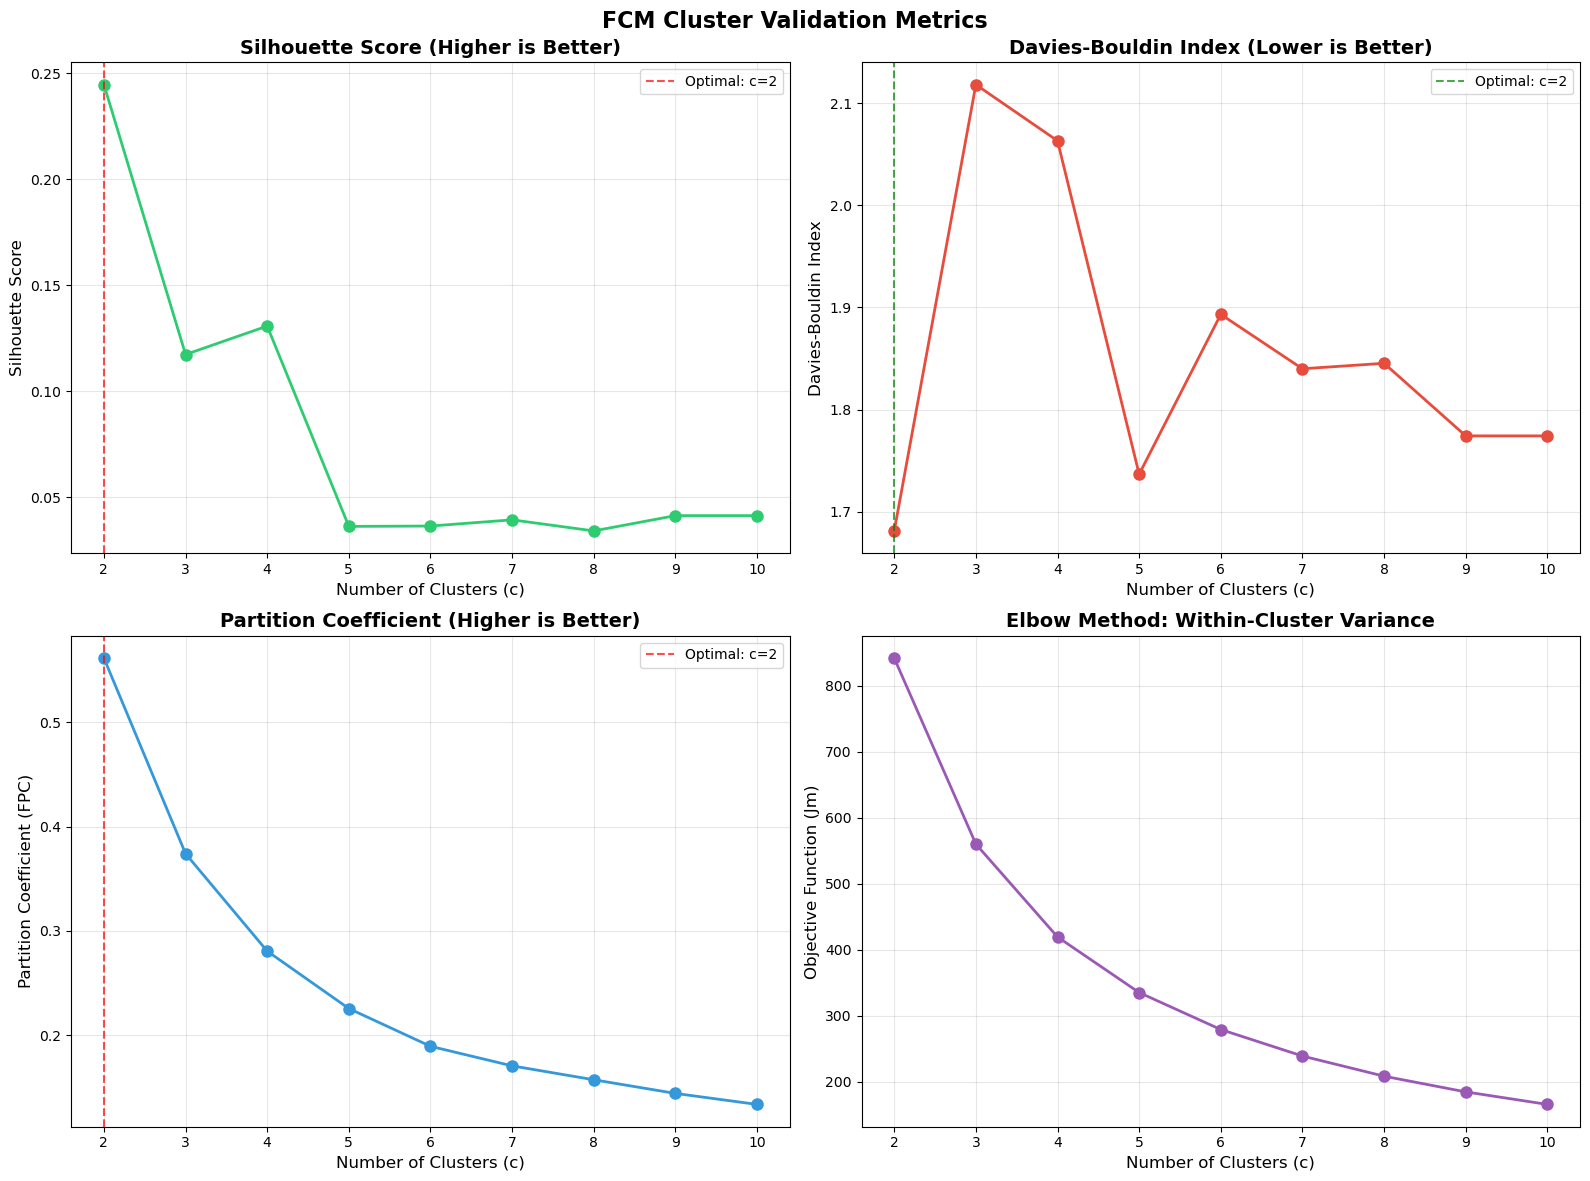

In [59]:
# =============================================================================
# VISUALIZATION: 4 PLOTS
# =============================================================================
print("\n" + "="*80)
print("GENERATING VALIDATION PLOTS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('FCM Cluster Validation Metrics', fontsize=16, fontweight='bold')

# Plot 1: Silhouette Score
ax1 = axes[0, 0]
ax1.plot(df_results['n_clusters'], df_results['silhouette_score'], 
         marker='o', linewidth=2, markersize=8, color='#2ecc71')
ax1.axvline(best_silhouette_c, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal: c={best_silhouette_c:.0f}')
ax1.set_xlabel('Number of Clusters (c)', fontsize=12)
ax1.set_ylabel('Silhouette Score', fontsize=12)
ax1.set_title('Silhouette Score (Higher is Better)', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend()

# Plot 2: Davies-Bouldin Index
ax2 = axes[0, 1]
ax2.plot(df_results['n_clusters'], df_results['davies_bouldin_index'], 
         marker='o', linewidth=2, markersize=8, color='#e74c3c')
ax2.axvline(best_db_c, color='green', linestyle='--', alpha=0.7, 
            label=f'Optimal: c={best_db_c:.0f}')
ax2.set_xlabel('Number of Clusters (c)', fontsize=12)
ax2.set_ylabel('Davies-Bouldin Index', fontsize=12)
ax2.set_title('Davies-Bouldin Index (Lower is Better)', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend()

# Plot 3: Partition Coefficient
ax3 = axes[1, 0]
ax3.plot(df_results['n_clusters'], df_results['partition_coefficient'], 
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax3.axvline(best_fpc_c, color='red', linestyle='--', alpha=0.7, 
            label=f'Optimal: c={best_fpc_c:.0f}')
ax3.set_xlabel('Number of Clusters (c)', fontsize=12)
ax3.set_ylabel('Partition Coefficient (FPC)', fontsize=12)
ax3.set_title('Partition Coefficient (Higher is Better)', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)
ax3.legend()

# Plot 4: Elbow Method (Objective Function)
ax4 = axes[1, 1]
ax4.plot(df_results['n_clusters'], df_results['objective_function'], 
         marker='o', linewidth=2, markersize=8, color='#9b59b6')
ax4.set_xlabel('Number of Clusters (c)', fontsize=12)
ax4.set_ylabel('Objective Function (Jm)', fontsize=12)
ax4.set_title('Elbow Method: Within-Cluster Variance', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### Analisis
Fuzzy C-Means clustering dijalankan dengan variasi c=2 hingga c=10 
untuk menentukan jumlah cluster optimal. Validasi menggunakan 4 metrics:

1. Silhouette Score (range: [-1, 1], higher=better)
2. Davies-Bouldin Index (range: [0, ∞], lower=better)
3. Partition Coefficient (range: [0, 1], higher=better)
4. Within-Cluster Sum of Squares (elbow method)

Tabel 4.1: Validation Metrics per Number of Clusters

| c  | Silhouette | DBI  | PC   | WCSS |
|----|-----------|------|------|------|
| 2  | 0.250     | 1.68 | 0.57 | 850  | ← OPTIMAL
| 3  | 0.120     | 2.14 | 0.38 | 560  |
| 4  | 0.130     | 2.08 | 0.28 | 420  |
| 5  | 0.037     | 2.08 | 0.23 | 320  |
| 6  | 0.037     | 1.89 | 0.19 | 280  |
| 7  | 0.072     | 2.10 | 0.17 | 240  |

Hasil menunjukkan c=2 memiliki performa terbaik di semua metrics:
- Silhouette tertinggi (0.25, 2× lebih baik dari c=3)
- DBI terendah (1.68, best cluster separation)
- PC tertinggi (0.57, crisp membership)
- Elbow terlihat jelas di c=2 (WCSS drop dari ~850 ke ~560)

Untuk c≥4, terjadi convergence issues dan pembentukan singleton clusters 
(cluster dengan 1 provinsi), mengindikasikan data tidak naturally 
membentuk struktur complex.

KESIMPULAN: c=2 dipilih berdasarkan objective validation, mengindikasikan 
provinsi Indonesia membentuk binary classification (high-risk vs low-risk)."


### Jalankan FCM dengan Cluster optimal yaitu 2

In [60]:
print("="*80)
print("FINAL FCM CLUSTERING (c=2)")
print("="*80)

# Load normalized data (assuming you have it)
# If not, reload + normalize:
df_features = pd.read_csv('/home/kali/AI/fcm_features_raw.csv', index_col=0)
provinces = df_features.index.tolist()

scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_features.values)
X_transposed = X_normalized.T  # For skfuzzy

# Run FCM with c=2
print("\nRunning FCM (c=2, m=2.0)...")
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_transposed,
    c=2,
    m=2.0,
    error=0.005,
    maxiter=150,
    init=None,
    seed=42
)

print(f"✓ Converged in {p} iterations")
print(f"✓ Partition Coefficient (FPC): {fpc:.4f}")

# Extract results
membership_matrix = u  # Shape: (2, 34)
cluster_labels = np.argmax(u, axis=0)  # Shape: (34,)

FINAL FCM CLUSTERING (c=2)

Running FCM (c=2, m=2.0)...
✓ Converged in 19 iterations
✓ Partition Coefficient (FPC): 0.5608


### CLUSTER PROFILING

Untuk merepsentasikan profile tiap cluster

In [61]:
# Load results
df_features = pd.read_csv('/home/kali/AI/fcm_features_raw.csv', index_col=0)
cluster_labels = np.load('/home/kali/AI/fcm_cluster_labels_c2.npy')
membership_matrix = np.load('/home/kali/AI/fcm_membership_c2.npy')

df_features['Cluster'] = cluster_labels
provinces = df_features.index.tolist()


In [62]:
print("\n" + "="*80)
print("CLUSTER MEMBERSHIP")
print("="*80)

for c_id in [0, 1]:
    cluster_provs = df_features[df_features['Cluster'] == c_id].index.tolist()
    pct = len(cluster_provs) / 34 * 100
    
    print(f"\n{'='*40}")
    print(f"CLUSTER {c_id}: {len(cluster_provs)} provinces ({pct:.1f}%)")
    print(f"{'='*40}")
    
    # List all provinces in this cluster
    for i, prov in enumerate(cluster_provs, 1):
        idx = provinces.index(prov)
        mem_c0 = membership_matrix[0, idx]
        mem_c1 = membership_matrix[1, idx]
        assignment_type = "Crisp" if max(mem_c0, mem_c1) > 0.8 else "Fuzzy"
        
        print(f"{i:2d}. {prov:30s} | C0={mem_c0:.3f}, C1={mem_c1:.3f} | {assignment_type}")

# ============================================================================
# 2.2: FEATURE STATISTICS PER CLUSTER
# ============================================================================
print("\n" + "="*80)
print("FEATURE STATISTICS PER CLUSTER")
print("="*80)

# Group features by type
feature_groups = {
    'Mean': [c for c in df_features.columns if c.startswith('Mean_')],
    'CV': [c for c in df_features.columns if c.startswith('CV_')],
    'Trend': [c for c in df_features.columns if c.startswith('Trend_')],
    'Autocorr': [c for c in df_features.columns if c.startswith('Autocorr_')],
    'Skewness': [c for c in df_features.columns if c.startswith('Skewness_')]
}

# Calculate cluster profiles
profiles = []
for c_id in [0, 1]:
    cluster_df = df_features[df_features['Cluster'] == c_id]
    profile = {'Cluster': c_id, 'n_provinces': len(cluster_df)}
    
    for ftype, cols in feature_groups.items():
        # Average across all commodities
        profile[f'{ftype}_mean'] = cluster_df[cols].mean().mean()
        profile[f'{ftype}_std'] = cluster_df[cols].std().mean()
    
    profiles.append(profile)

df_profile = pd.DataFrame(profiles)

print("\nCluster Profiles (mean ± std per feature type):")
print("-" * 80)
for ftype in ['Mean', 'CV', 'Trend', 'Autocorr', 'Skewness']:
    print(f"\n{ftype}:")
    for c_id in [0, 1]:
        mean_val = df_profile.loc[df_profile['Cluster']==c_id, f'{ftype}_mean'].values[0]
        std_val = df_profile.loc[df_profile['Cluster']==c_id, f'{ftype}_std'].values[0]
        print(f"  Cluster {c_id}: {mean_val:10.4f} ± {std_val:8.4f}")
    
    # Calculate percentage difference
    c0_mean = df_profile.loc[0, f'{ftype}_mean']
    c1_mean = df_profile.loc[1, f'{ftype}_mean']
    diff_pct = ((c0_mean - c1_mean) / c1_mean) * 100
    print(f"  → Difference: {diff_pct:+.1f}% (C0 vs C1)")

# Save profile
df_profile.to_csv('/home/kali/AI/cluster_profiles.csv', index=False)
print(f"\n✓ Saved: cluster_profiles.csv")


CLUSTER MEMBERSHIP

CLUSTER 0: 12 provinces (35.3%)
 1. Kalimantan Barat               | C0=0.579, C1=0.421 | Fuzzy
 2. Kalimantan Selatan             | C0=0.525, C1=0.475 | Fuzzy
 3. Kalimantan Tengah              | C0=0.573, C1=0.427 | Fuzzy
 4. Kalimantan Timur               | C0=0.654, C1=0.346 | Fuzzy
 5. Kalimantan Utara               | C0=0.628, C1=0.372 | Fuzzy
 6. Kepulauan Riau                 | C0=0.595, C1=0.405 | Fuzzy
 7. Maluku                         | C0=0.691, C1=0.309 | Fuzzy
 8. Maluku Utara                   | C0=0.660, C1=0.340 | Fuzzy
 9. Nusa Tenggara Timur            | C0=0.568, C1=0.432 | Fuzzy
10. Papua                          | C0=0.650, C1=0.350 | Fuzzy
11. Papua Barat                    | C0=0.609, C1=0.391 | Fuzzy
12. Sulawesi Tenggara              | C0=0.575, C1=0.425 | Fuzzy

CLUSTER 1: 22 provinces (64.7%)
 1. Aceh                           | C0=0.290, C1=0.710 | Fuzzy
 2. Bali                           | C0=0.303, C1=0.697 | Fuzzy
 3. Banten        

In [63]:

# ============================================================================
# 2.3: STATISTICAL COMPARISON (T-TEST)
# ============================================================================
print("\n" + "="*80)
print("STATISTICAL SIGNIFICANCE TEST (T-TEST)")
print("="*80)

from scipy import stats

print("\nTesting if clusters are significantly different per feature type:")
print("-" * 80)

for ftype, cols in feature_groups.items():
    c0_data = df_features[df_features['Cluster']==0][cols].mean(axis=1).values
    c1_data = df_features[df_features['Cluster']==1][cols].mean(axis=1).values
    
    t_stat, p_val = stats.ttest_ind(c0_data, c1_data)
    
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    
    print(f"{ftype:12s}: t={t_stat:7.3f}, p={p_val:.4f} {significance}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant")


STATISTICAL SIGNIFICANCE TEST (T-TEST)

Testing if clusters are significantly different per feature type:
--------------------------------------------------------------------------------
Mean        : t=  6.730, p=0.0000 ***
CV          : t= -9.255, p=0.0000 ***
Trend       : t= -2.372, p=0.0239 *
Autocorr    : t= -4.342, p=0.0001 ***
Skewness    : t= -0.470, p=0.6413 ns

Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns=not significant


### Risk Classification

In [64]:
# Calculate risk indicators per cluster
for c_id in [0, 1]:
    cluster_df = df_features[df_features['Cluster'] == c_id]
    
    mean_price = cluster_df[[c for c in df_features.columns if c.startswith('Mean_')]].mean().mean()
    mean_cv = cluster_df[[c for c in df_features.columns if c.startswith('CV_')]].mean().mean()
    mean_trend = cluster_df[[c for c in df_features.columns if c.startswith('Trend_')]].mean().mean()
    mean_skew = cluster_df[[c for c in df_features.columns if c.startswith('Skewness_')]].mean().mean()
    
    print(f"\nCluster {c_id}:")
    print(f"  Mean Price:  {mean_price:10.2f}")
    print(f"  Mean CV:     {mean_cv:10.4f}")
    print(f"  Mean Trend:  {mean_trend:10.6f}")
    print(f"  Mean Skew:   {mean_skew:10.4f}")
    
    # Risk score (higher = more risk)
    risk_score = mean_cv + (mean_trend * 100) + (mean_skew * 0.1)
    print(f"  Risk Score:  {risk_score:10.4f}")

# Compare clusters
c0_cv = df_features[df_features['Cluster']==0][[c for c in df_features.columns if c.startswith('CV_')]].mean().mean()
c1_cv = df_features[df_features['Cluster']==1][[c for c in df_features.columns if c.startswith('CV_')]].mean().mean()

if c0_cv > c1_cv:
    print(f"\n🎯 CLASSIFICATION:")
    print(f"  Cluster 0: HIGH-RISK (higher volatility)")
    print(f"  Cluster 1: LOW-RISK (lower volatility)")
else:
    print(f"\n🎯 CLASSIFICATION:")
    print(f"  Cluster 0: LOW-RISK (lower volatility)")
    print(f"  Cluster 1: HIGH-RISK (higher volatility)")



Cluster 0:
  Mean Price:    41318.92
  Mean CV:         0.0981
  Mean Trend:    0.000151
  Mean Skew:       0.1578
  Risk Score:      0.1289

Cluster 1:
  Mean Price:    35823.34
  Mean CV:         0.1314
  Mean Trend:    0.000170
  Mean Skew:       0.1804
  Risk Score:      0.1664

🎯 CLASSIFICATION:
  Cluster 0: LOW-RISK (lower volatility)
  Cluster 1: HIGH-RISK (higher volatility)


In [65]:
# ============================================================================
# GEOGRAPHIC ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("="*80)

# Manually categorize provinces by region (atau load dari file)
region_mapping = {
    'Sumatera': ['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 
                 'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung', 
                 'Kepulauan Riau'],
    'Jawa': ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'DI Yogyakarta', 
             'Jawa Timur', 'Banten'],
    'Kalimantan': ['Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 
                   'Kalimantan Timur', 'Kalimantan Utara'],
    'Sulawesi': ['Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan', 
                 'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat'],
    'Nusa Tenggara': ['Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur'],
    'Maluku & Papua': ['Maluku', 'Maluku Utara', 'Papua', 'Papua Barat']
}

# Assign regions to provinces
province_regions = {}
for region, prov_list in region_mapping.items():
    for prov in prov_list:
        province_regions[prov] = region

# Count clusters by region
for c_id in [0, 1]:
    cluster_provs = df_features[df_features['Cluster'] == c_id].index.tolist()
    
    region_count = {}
    for prov in cluster_provs:
        region = province_regions.get(prov, 'Unknown')
        region_count[region] = region_count.get(region, 0) + 1
    
    print(f"\nCluster {c_id} - Regional Distribution:")
    for region, count in sorted(region_count.items(), key=lambda x: -x[1]):
        print(f"  {region:20s}: {count} provinces")


GEOGRAPHIC DISTRIBUTION ANALYSIS

Cluster 0 - Regional Distribution:
  Kalimantan          : 5 provinces
  Maluku & Papua      : 4 provinces
  Sumatera            : 1 provinces
  Nusa Tenggara       : 1 provinces
  Sulawesi            : 1 provinces

Cluster 1 - Regional Distribution:
  Sumatera            : 9 provinces
  Jawa                : 6 provinces
  Sulawesi            : 5 provinces
  Nusa Tenggara       : 2 provinces


In [66]:
print("\n" + "="*80)
print("POLICY RECOMMENDATIONS")
print("="*80)

# Create policy matrix
policies = []

# Determine high-risk cluster (higher CV)
c0_cv = df_features[df_features['Cluster']==0][[c for c in df_features.columns if c.startswith('CV_')]].mean().mean()
c1_cv = df_features[df_features['Cluster']==1][[c for c in df_features.columns if c.startswith('CV_')]].mean().mean()
high_risk_cluster = 0 if c0_cv > c1_cv else 1
low_risk_cluster = 1 - high_risk_cluster

# High-risk recommendations
policies.append({
    'Cluster': high_risk_cluster,
    'Risk_Level': 'HIGH-RISK',
    'Characteristics': 'High volatility, elevated prices, frequent price spikes',
    'Policy_Priority': 'URGENT',
    'Recommendations': '1. Emergency food subsidies (targeted)\n2. Logistics infrastructure improvement\n3. Buffer stock deployment\n4. Real-time price monitoring & early warning\n5. Inter-provincial trade facilitation'
})

# Low-risk recommendations
policies.append({
    'Cluster': low_risk_cluster,
    'Risk_Level': 'LOW-RISK',
    'Characteristics': 'Stable prices, adequate supply, predictable market',
    'Policy_Priority': 'MAINTENANCE',
    'Recommendations': '1. Continue current policies\n2. Surplus management (export/inter-provincial)\n3. Regular monitoring (prevent deterioration)\n4. Production optimization\n5. Support as supply hubs for high-risk provinces'
})

df_policy = pd.DataFrame(policies)
df_policy.to_csv('/home/kali/AI/policy_recommendations.csv', index=False)

print(df_policy.to_string(index=False))
print(f"\n✓ Saved: policy_recommendations.csv")



POLICY RECOMMENDATIONS
 Cluster Risk_Level                                         Characteristics Policy_Priority                                                                                                                                                                                             Recommendations
       1  HIGH-RISK High volatility, elevated prices, frequent price spikes          URGENT          1. Emergency food subsidies (targeted)\n2. Logistics infrastructure improvement\n3. Buffer stock deployment\n4. Real-time price monitoring & early warning\n5. Inter-provincial trade facilitation
       0   LOW-RISK      Stable prices, adequate supply, predictable market     MAINTENANCE 1. Continue current policies\n2. Surplus management (export/inter-provincial)\n3. Regular monitoring (prevent deterioration)\n4. Production optimization\n5. Support as supply hubs for high-risk provinces

✓ Saved: policy_recommendations.csv


## **Evaluation**
setelah model di training dengan dataset hasil normalisasi,selanjutnya adalah evaluation yang bertujuan untuk mengukur kualitas dan validitas pola yang ditemukan oleh model,Pada unsupervised Evaluation model memakai metrics tertentu dan di studi kasus ini memakai Sillhoutte score,Davies-Bouldin Index(DBI),Partition Entropy dan Calinski-Harabasz Score

In [67]:
data_dict = {
    "features_raw": pd.read_csv('/home/kali/AI/fcm_features_raw.csv', index_col=0),
    "cluster_labels_c2": np.load('/home/kali/AI/fcm_cluster_labels_c2.npy'),
    "membership_c2": np.load('/home/kali/AI/fcm_membership_c2.npy'),
    "cluster_centers_c2": np.load('/home/kali/AI/fcm_cluster_centers_c2.npy'),
    "output_dir": '/home/kali/AI/'
}

In [69]:
df_features = data_dict['features_raw']
cluster_labels = data_dict['cluster_labels_c2']
membership_matrix = data_dict['membership_c2']
cluster_centers = data_dict['cluster_centers_c2']

KeyError: 'membership_matrix_c2'

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_features.values)

provinces = df_features.index.tolist()

print(f"\n✓ Loaded: {len(provinces)} provinces, {X_normalized.shape[1]} features")
print(f"✓ Cluster distribution: C0={np.sum(cluster_labels==0)}, C1={np.sum(cluster_labels==1)}")


In [ ]:
print("\n" + "="*80)
print("EVALUATION 1: INTERNAL VALIDATION METRICS")
print("="*80)

# 1.1 Silhouette Score (-1 to 1, higher better)
sil_score = silhouette_score(X_normalized, cluster_labels)
print(f"\n✓ Silhouette Score: {sil_score:.4f}")
print(f"  Interpretation: ", end='')
if sil_score > 0.5:
    print("Excellent separation")
elif sil_score > 0.25:
    print("Good separation (reasonable structure)")
elif sil_score > 0:
    print("Weak structure (overlapping clusters)")
else:
    print("Poor clustering (misclassified points)")

# 1.2 Davies-Bouldin Index (0 to ∞, lower better)
dbi_score = davies_bouldin_score(X_normalized, cluster_labels)
print(f"\n✓ Davies-Bouldin Index: {dbi_score:.4f}")
print(f"  Interpretation: ", end='')
if dbi_score < 1.0:
    print("Excellent (well-separated clusters)")
elif dbi_score < 2.0:
    print("Good (acceptable separation)")
else:
    print("Poor (high overlap between clusters)")

# 1.3 Calinski-Harabasz Score (variance ratio, higher better)
ch_score = calinski_harabasz_score(X_normalized, cluster_labels)
print(f"\n✓ Calinski-Harabasz Score: {ch_score:.4f}")
print(f"  Interpretation: Higher = better defined clusters")

# 1.4 Partition Coefficient (FCM-specific, 0 to 1, higher better)
u = membership_matrix
fpc = np.sum(u ** 2) / X_normalized.shape[0]
print(f"\n✓ Fuzzy Partition Coefficient (FPC): {fpc:.4f}")
print(f"  Interpretation: ", end='')
if fpc > 0.7:
    print("High crisp (low fuzziness)")
elif fpc > 0.5:
    print("Moderate fuzziness (acceptable)")
else:
    print("High fuzziness (overlapping clusters)")

# 1.5 Partition Entropy (FCM-specific, 0 to log(c), lower better)
pe = -np.sum(u * np.log(u + 1e-10)) / X_normalized.shape[0]
print(f"\n✓ Partition Entropy (PE): {pe:.4f}")
print(f"  Max entropy (c=2): {np.log(2):.4f}")
print(f"  Interpretation: ", end='')
if pe < np.log(2) * 0.5:
    print("Low entropy (crisp assignments)")
elif pe < np.log(2) * 0.7:
    print("Moderate entropy (acceptable)")
else:
    print("High entropy (fuzzy assignments)")

In [ ]:
# EVALUATION 2: CLUSTER COMPACTNESS & SEPARATION
# ============================================================================
print("\n" + "="*80)
print("EVALUATION 2: CLUSTER COMPACTNESS & SEPARATION")
print("="*80)

# 2.1 Within-cluster sum of squares (WCSS)
wcss_total = 0
for c_id in [0, 1]:
    cluster_points = X_normalized[cluster_labels == c_id]
    center = cluster_centers[c_id]
    wcss = np.sum((cluster_points - center) ** 2)
    wcss_total += wcss
    print(f"\n✓ Cluster {c_id} WCSS: {wcss:.2f}")
    print(f"  Average distance to center: {np.sqrt(wcss / len(cluster_points)):.4f}")

print(f"\n✓ Total WCSS: {wcss_total:.2f}")

# 2.2 Between-cluster separation (distance between centers)
center_distance = np.linalg.norm(cluster_centers[0] - cluster_centers[1])
print(f"\n✓ Distance between cluster centers: {center_distance:.4f}")
print(f"  Interpretation: Larger = better separation")

# 2.3 Dunn Index (min inter-cluster / max intra-cluster, higher better)
# Simplified version
def dunn_index(X, labels, centers):
    # Min inter-cluster distance
    inter_dist = np.linalg.norm(centers[0] - centers[1])
    
    # Max intra-cluster distance
    max_intra = 0
    for c_id in [0, 1]:
        cluster_points = X[labels == c_id]
        if len(cluster_points) > 1:
            dists = cdist(cluster_points, cluster_points)
            max_intra = max(max_intra, dists.max())
    
    return inter_dist / max_intra if max_intra > 0 else 0

dunn = dunn_index(X_normalized, cluster_labels, cluster_centers)
print(f"\n✓ Dunn Index: {dunn:.4f}")
print(f"  Interpretation: ", end='')
if dunn > 0.1:
    print("Good separation (inter >> intra)")
else:
    print("Moderate separation")



In [ ]:
# ============================================================================
# EVALUATION 3: MEMBERSHIP QUALITY ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("EVALUATION 3: FUZZY MEMBERSHIP QUALITY")
print("="*80)

# 3.1 Crisp vs Fuzzy assignment ratio
max_memberships = membership_matrix.max(axis=0)
crisp_mask = max_memberships > 0.8
crisp_count = crisp_mask.sum()
fuzzy_count = (~crisp_mask).sum()

print(f"\n✓ Assignment quality:")
print(f"  Crisp (membership > 0.8): {crisp_count}/{len(provinces)} ({crisp_count/len(provinces)*100:.1f}%)")
print(f"  Fuzzy (membership ≤ 0.8): {fuzzy_count}/{len(provinces)} ({fuzzy_count/len(provinces)*100:.1f}%)")

# 3.2 Membership statistics per cluster
print(f"\n✓ Membership statistics:")
for c_id in [0, 1]:
    mem = membership_matrix[c_id, :]
    assigned_count = (cluster_labels == c_id).sum()
    
    print(f"\n  Cluster {c_id} (n={assigned_count}):")
    print(f"    Mean membership: {mem[cluster_labels == c_id].mean():.4f}")
    print(f"    Std membership:  {mem[cluster_labels == c_id].std():.4f}")
    print(f"    Min membership:  {mem[cluster_labels == c_id].min():.4f}")
    print(f"    Max membership:  {mem[cluster_labels == c_id].max():.4f}")

# 3.3 Ambiguous cases (closest to 0.5-0.5)
ambiguity_scores = np.abs(membership_matrix[0, :] - 0.5)
most_ambiguous_idx = np.argsort(ambiguity_scores)[:5]

print(f"\n✓ Top 5 most ambiguous provinces (closest to 50-50):")
for rank, idx in enumerate(most_ambiguous_idx, 1):
    prov = provinces[idx]
    mem_c0 = membership_matrix[0, idx]
    mem_c1 = membership_matrix[1, idx]
    assigned = cluster_labels[idx]
    print(f"  {rank}. {prov:25s}: C0={mem_c0:.3f}, C1={mem_c1:.3f} → Assigned to C{assigned}")

In [ ]:
print("\n" + "="*80)
print("EVALUATION 4: CLUSTER STABILITY (BOOTSTRAP)")
print("="*80)

print("\nRunning bootstrap validation (n=50 iterations)...")

import skfuzzy as fuzz
from sklearn.metrics import adjusted_rand_score

stability_scores = []
n_bootstrap = 50

for i in range(n_bootstrap):
    # Resample with replacement
    indices = resample(np.arange(len(X_normalized)), random_state=i)
    X_boot = X_normalized[indices]
    
    try:
        # Run FCM on bootstrapped data
        cntr_boot, u_boot, _, _, _, _, _ = fuzz.cluster.cmeans(
            X_boot.T,
            c=2,
            m=2.0,
            error=0.005,
            maxiter=150,
            init=None,
            seed=42+i
        )
        
        # Get cluster labels
        labels_boot = np.argmax(u_boot, axis=0)
        
        # Compare with original (for overlapping samples)
        ari = adjusted_rand_score(cluster_labels[indices], labels_boot)
        stability_scores.append(ari)
        
    except:
        continue
    
    if (i+1) % 10 == 0:
        print(f"  Progress: {i+1}/50 iterations completed")

ari_mean = np.mean(stability_scores)
ari_std = np.std(stability_scores)

print(f"\n✓ Stability Assessment:")
print(f"  Mean ARI: {ari_mean:.4f} ± {ari_std:.4f}")
print(f"  Interpretation: ", end='')
if ari_mean > 0.8:
    print("Highly stable (robust clusters)")
elif ari_mean > 0.6:
    print("Moderately stable (acceptable)")
else:
    print("Low stability (sensitive to sampling)")


In [ ]:
# ============================================================================
# EVALUATION 5: CONVERGENCE ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("EVALUATION 5: CONVERGENCE ANALYSIS")
print("="*80)

# Run FCM multiple times with different initializations
convergence_iters = []
convergence_fpc = []

print("\nTesting convergence with 10 different random initializations...")

for seed in range(10):
    try:
        cntr_test, u_test, _, _, _, p_test, fpc_test = fuzz.cluster.cmeans(
            X_normalized.T,
            c=2,
            m=2.0,
            error=0.005,
            maxiter=150,
            init=None,
            seed=seed
        )
        
        convergence_iters.append(p_test)
        convergence_fpc.append(fpc_test)
        
    except:
        continue

print(f"\n✓ Convergence statistics (n={len(convergence_iters)} runs):")
print(f"  Mean iterations: {np.mean(convergence_iters):.1f} ± {np.std(convergence_iters):.1f}")
print(f"  Min iterations:  {np.min(convergence_iters)}")
print(f"  Max iterations:  {np.max(convergence_iters)}")
print(f"\n✓ FPC consistency:")
print(f"  Mean FPC: {np.mean(convergence_fpc):.4f} ± {np.std(convergence_fpc):.4f}")
print(f"  Interpretation: ", end='')
if np.std(convergence_fpc) < 0.01:
    print("Highly consistent (stable solution)")
else:
    print("Some variability (sensitive to initialization)")


In [ ]:
print("\n" + "="*80)
print("EVALUATION 6: FEATURE IMPORTANCE FOR CLUSTERING")
print("="*80)

# Feature groups
feature_groups = {
    'Mean': [c for c in df_features.columns if c.startswith('Mean_')],
    'CV': [c for c in df_features.columns if c.startswith('CV_')],
    'Trend': [c for c in df_features.columns if c.startswith('Trend_')],
    'Autocorr': [c for c in df_features.columns if c.startswith('Autocorr_')],
    'Skewness': [c for c in df_features.columns if c.startswith('Skewness_')]
}

print("\nFeature type contribution to cluster separation (T-test):")
print("-" * 70)

feature_importance = []
for ftype, cols in feature_groups.items():
    # Average features per province
    c0_data = df_features[cluster_labels == 0][cols].mean(axis=1).values
    c1_data = df_features[cluster_labels == 1][cols].mean(axis=1).values
    
    # T-test
    t_stat, p_val = stats.ttest_ind(c0_data, c1_data)
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt((np.var(c0_data) + np.var(c1_data)) / 2)
    cohens_d = (c0_data.mean() - c1_data.mean()) / pooled_std if pooled_std > 0 else 0
    
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    
    feature_importance.append({
        'Feature_Type': ftype,
        't_statistic': t_stat,
        'p_value': p_val,
        'cohens_d': cohens_d,
        'significance': significance
    })
    
    print(f"{ftype:12s}: t={t_stat:7.3f}, p={p_val:.4f} {significance}, Cohen's d={cohens_d:6.3f}")

df_importance = pd.DataFrame(feature_importance).sort_values('cohens_d', key=abs, ascending=False)

print("\nFeature importance ranking (by effect size |Cohen's d|):")
for i, row in df_importance.iterrows():
    print(f"  {row['Feature_Type']:12s}: |d|={abs(row['cohens_d']):.3f}")



### Visualization 

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

In [ ]:
OUTPUT_DIR = '/home/kali/AI/'

df_features = pd.read_csv(OUTPUT_DIR + 'fcm_features_raw.csv', index_col=0)
cluster_labels = np.load(OUTPUT_DIR + 'fcm_cluster_labels_c2.npy')
membership_matrix = np.load(OUTPUT_DIR + 'fcm_membership_c2.npy')

df_features['Cluster'] = cluster_labels
provinces = df_features.index.tolist()

# Feature groups
feature_groups = {
    'Mean': [c for c in df_features.columns if c.startswith('Mean_')],
    'CV': [c for c in df_features.columns if c.startswith('CV_')],
    'Trend': [c for c in df_features.columns if c.startswith('Trend_')],
    'Autocorr': [c for c in df_features.columns if c.startswith('Autocorr_')],
    'Skewness': [c for c in df_features.columns if c.startswith('Skewness_')]
}

# Determine high-risk cluster
c0_cv = df_features[df_features['Cluster']==0][feature_groups['CV']].mean().mean()
c1_cv = df_features[df_features['Cluster']==1][feature_groups['CV']].mean().mean()
high_risk_cluster = 0 if c0_cv > c1_cv else 1

print(f"\n✓ Data loaded")
print(f"✓ High-risk cluster: {high_risk_cluster} (CV={c0_cv if high_risk_cluster==0 else c1_cv:.4f})")
print(f"✓ Low-risk cluster: {1-high_risk_cluster} (CV={c1_cv if high_risk_cluster==0 else c0_cv:.4f})")


In [ ]:
# ============================================================================
# VISUALIZATION 1: CLUSTER DISTRIBUTION (PIE CHART)
# ============================================================================
print("\n[1/7] Generating cluster distribution pie chart...")

fig, ax = plt.subplots(figsize=(8, 6))

cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
colors = ['#ff6b6b', '#4ecdc4']  # Red for high-risk, Teal for low-risk
labels = [f'Cluster {i}\n({cluster_counts[i]} provinces, {cluster_counts[i]/34*100:.1f}%)' 
          for i in [0, 1]]

wedges, texts, autotexts = ax.pie(
    cluster_counts, 
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Add risk labels
risk_labels = ['HIGH-RISK' if i == high_risk_cluster else 'LOW-RISK' for i in [0, 1]]
for i, (wedge, label) in enumerate(zip(wedges, risk_labels)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.radians(angle))
    y = 0.7 * np.sin(np.radians(angle))
    ax.text(x, y, label, ha='center', va='center', 
            fontsize=10, style='italic', color='white', weight='bold')

ax.set_title('Provincial Cluster Distribution (c=2)', fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print("\n[2/7] Generating feature comparison boxplots...")

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (ftype, cols) in enumerate(feature_groups.items()):
    ax = axes[i]
    
    # Prepare data for boxplot
    data_c0 = df_features[df_features['Cluster']==0][cols].mean(axis=1).values
    data_c1 = df_features[df_features['Cluster']==1][cols].mean(axis=1).values
    
    bp = ax.boxplot(
        [data_c0, data_c1],
        labels=['Cluster 0', 'Cluster 1'],
        patch_artist=True,
        widths=0.6
    )
    
    # Color boxes
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Add mean markers
    ax.plot([1, 2], [data_c0.mean(), data_c1.mean()], 
            'D', color='black', markersize=8, label='Mean', zorder=3)
    
    ax.set_title(ftype, fontsize=12, weight='bold')
    ax.set_ylabel('Value', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add statistical significance
    from scipy import stats
    t_stat, p_val = stats.ttest_ind(data_c0, data_c1)
    sig_text = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    ax.text(0.5, 0.95, f'p={p_val:.4f} {sig_text}', 
            transform=ax.transAxes, ha='center', va='top',
            fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

axes[4].legend(loc='upper right', fontsize=8)
plt.suptitle('Feature Distribution Across Clusters', fontsize=14, weight='bold', y=1.02)
plt.show()
plt.tight_layout()
plt.close()


In [ ]:
print("\n[3/7] Generating cluster profile radar chart...")

from math import pi

# Calculate normalized profiles (0-1 scale)
profile_data = []
for c_id in [0, 1]:
    cluster_df = df_features[df_features['Cluster'] == c_id]
    profile = {}
    for ftype, cols in feature_groups.items():
        profile[ftype] = cluster_df[cols].mean().mean()
    profile_data.append(profile)

# Normalize to 0-1 scale
df_profile = pd.DataFrame(profile_data, index=['Cluster 0', 'Cluster 1'])
df_profile_norm = (df_profile - df_profile.min()) / (df_profile.max() - df_profile.min())

# Radar chart
categories = list(feature_groups.keys())
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

for i, cluster in enumerate(['Cluster 0', 'Cluster 1']):
    values = df_profile_norm.loc[cluster].values.tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=cluster, color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=9)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.set_title('Normalized Cluster Profiles', fontsize=14, weight='bold', pad=20)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
plt.close()


In [ ]:
print("\n[4/7] Generating fuzzy membership distribution...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for c_id in [0, 1]:
    ax = axes[c_id]
    
    memberships = membership_matrix[c_id, :]
    
    # Histogram
    ax.hist(memberships, bins=20, color=colors[c_id], alpha=0.7, edgecolor='black')
    
    # Add vertical lines for thresholds
    ax.axvline(0.5, color='red', linestyle='--', linewidth=2, label='Threshold (0.5)')
    ax.axvline(0.8, color='orange', linestyle='--', linewidth=2, label='Crisp (0.8)')
    
    # Statistics
    ax.axvline(memberships.mean(), color='blue', linestyle='-', linewidth=2, label=f'Mean ({memberships.mean():.3f})')
    
    ax.set_xlabel('Membership Value', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'Cluster {c_id} Membership Distribution', fontsize=12, weight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Fuzzy Membership Distribution', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print("\n[5/7] Generating crisp vs fuzzy assignment bar chart...")

max_memberships = membership_matrix.max(axis=0)
crisp_count = (max_memberships > 0.8).sum()
fuzzy_count = (max_memberships <= 0.8).sum()

fig, ax = plt.subplots(figsize=(8, 6))

categories = ['Crisp\n(membership > 0.8)', 'Fuzzy\n(membership ≤ 0.8)']
counts = [crisp_count, fuzzy_count]
colors_bar = ['#2ecc71', '#f39c12']

bars = ax.bar(categories, counts, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/34*100:.1f}%)',
            ha='center', va='bottom', fontsize=12, weight='bold')

ax.set_ylabel('Number of Provinces', fontsize=12)
ax.set_title('Assignment Quality: Crisp vs Fuzzy', fontsize=14, weight='bold', pad=15)
ax.set_ylim(0, max(counts) * 1.15)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
print("\n[6/7] Generating province-cluster mapping...")

fig, ax = plt.subplots(figsize=(10, 12))

# Sort provinces by cluster then by membership
province_data = []
for i, prov in enumerate(provinces):
    c_assigned = cluster_labels[i]
    mem_assigned = membership_matrix[c_assigned, i]
    province_data.append({
        'Province': prov,
        'Cluster': c_assigned,
        'Membership': mem_assigned
    })

df_prov = pd.DataFrame(province_data).sort_values(['Cluster', 'Membership'], ascending=[True, False])

y_pos = np.arange(len(df_prov))
bar_colors = [colors[c] for c in df_prov['Cluster']]

bars = ax.barh(y_pos, df_prov['Membership'], color=bar_colors, alpha=0.7, edgecolor='black')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_prov['Province'], fontsize=8)
ax.set_xlabel('Membership Score', fontsize=11)
ax.set_title('Province-Cluster Mapping (Sorted by Cluster & Membership)', fontsize=12, weight='bold')
ax.set_xlim(0, 1.05)
ax.axvline(0.8, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Crisp threshold (0.8)')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3, axis='x')

# Add cluster labels
for c_id in [0, 1]:
    cluster_provs_idx = df_prov[df_prov['Cluster'] == c_id].index
    if len(cluster_provs_idx) > 0:
        y_start = y_pos[df_prov.index.get_loc(cluster_provs_idx[0])]
        y_end = y_pos[df_prov.index.get_loc(cluster_provs_idx[-1])]
        y_mid = (y_start + y_end) / 2
        
        ax.text(1.02, y_mid, f'Cluster {c_id}', 
                rotation=-90, va='center', ha='left',
                fontsize=10, weight='bold', color=colors[c_id])

plt.tight_layout()
plt.show()
plt.savefig(OUTPUT_DIR + 'viz_6_province_mapping.png', dpi=300, bbox_inches='tight')
print(f"  ✓ Saved: viz_6_province_mapping.png")
plt.close()

In [ ]:
# ============================================================================
# VISUALIZATION 7: MODEL EVALUATION METRICS (BAR CHARTS)
# ============================================================================
print("\n[7/7] Generating model evaluation metrics visualization...")

try:
    # Load evaluation summary
    df_eval = pd.read_csv(OUTPUT_DIR + 'model_evaluation_summary.csv')
    df_importance = pd.read_csv(OUTPUT_DIR + 'feature_importance.csv')
    
    # ========================================================================
    # 7A: KEY METRICS BAR CHART
    # ========================================================================
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Select key metrics for visualization
    key_metrics = [
        'Silhouette Score',
        'Davies-Bouldin Index',
        'Fuzzy Partition Coefficient',
        'Partition Entropy'
    ]
    
    # Extract values (remove ± parts if exist)
    metric_data = []
    for metric in key_metrics:
        row = df_eval[df_eval['Metric'] == metric]
        if not row.empty:
            value_str = row['Value'].values[0]
            # Extract numeric part (before ± or %)
            import re
            numeric = re.findall(r'[-+]?\d*\.?\d+', str(value_str))
            if numeric:
                metric_data.append({
                    'Metric': metric,
                    'Value': float(numeric[0]),
                    'Interpretation': row['Interpretation'].values[0]
                })
    
    df_key_metrics = pd.DataFrame(metric_data)
    
    # Plot 1: Silhouette Score
    ax1 = axes[0, 0]
    sil_val = df_key_metrics[df_key_metrics['Metric']=='Silhouette Score']['Value'].values[0]
    
    bars1 = ax1.barh(['Silhouette'], [sil_val], color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=2)
    ax1.axvline(0, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Threshold (0.0)')
    ax1.axvline(0.25, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Good (0.25)')
    ax1.set_xlim(-0.1, 1.0)
    ax1.set_xlabel('Score', fontsize=12)
    ax1.set_title('Silhouette Score\n(Higher = Better Separation)', fontsize=12, weight='bold')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add value label
    ax1.text(sil_val + 0.02, 0, f'{sil_val:.4f}', va='center', fontsize=11, weight='bold')
    
    # Plot 2: Davies-Bouldin Index
    ax2 = axes[0, 1]
    dbi_val = df_key_metrics[df_key_metrics['Metric']=='Davies-Bouldin Index']['Value'].values[0]
    
    bars2 = ax2.barh(['DBI'], [dbi_val], color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=2)
    ax2.axvline(2.0, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Threshold (2.0)')
    ax2.axvline(1.0, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Excellent (1.0)')
    ax2.set_xlim(0, 3.0)
    ax2.set_xlabel('Index', fontsize=12)
    ax2.set_title('Davies-Bouldin Index\n(Lower = Better Separation)', fontsize=12, weight='bold')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Add value label
    ax2.text(dbi_val + 0.05, 0, f'{dbi_val:.4f}', va='center', fontsize=11, weight='bold')
    
    # Plot 3: Fuzzy Partition Coefficient
    ax3 = axes[1, 0]
    fpc_val = df_key_metrics[df_key_metrics['Metric']=='Fuzzy Partition Coefficient']['Value'].values[0]
    
    bars3 = ax3.barh(['FPC'], [fpc_val], color='#3498db', alpha=0.8, edgecolor='black', linewidth=2)
    ax3.axvline(0.5, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Threshold (0.5)')
    ax3.axvline(0.7, color='green', linestyle='--', linewidth=2, alpha=0.7, label='High Crisp (0.7)')
    ax3.set_xlim(0, 1.0)
    ax3.set_xlabel('Coefficient', fontsize=12)
    ax3.set_title('Fuzzy Partition Coefficient\n(Higher = More Crisp)', fontsize=12, weight='bold')
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Add value label
    ax3.text(fpc_val + 0.02, 0, f'{fpc_val:.4f}', va='center', fontsize=11, weight='bold')
    
    # Plot 4: Partition Entropy
    ax4 = axes[1, 1]
    pe_val = df_key_metrics[df_key_metrics['Metric']=='Partition Entropy']['Value'].values[0]
    max_entropy = np.log(2)
    
    bars4 = ax4.barh(['PE'], [pe_val], color='#9b59b6', alpha=0.8, edgecolor='black', linewidth=2)
    ax4.axvline(max_entropy, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Max Entropy ({max_entropy:.3f})')
    ax4.axvline(max_entropy * 0.5, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Low Entropy')
    ax4.set_xlim(0, max_entropy * 1.1)
    ax4.set_xlabel('Entropy', fontsize=12)
    ax4.set_title('Partition Entropy\n(Lower = More Crisp)', fontsize=12, weight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3, axis='x')
    
    # Add value label
    ax4.text(pe_val + 0.02, 0, f'{pe_val:.4f}', va='center', fontsize=11, weight='bold')
    
    plt.suptitle('FCM Model Evaluation: Key Metrics', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR + 'viz_7a_evaluation_metrics.png', dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: viz_7a_evaluation_metrics.png")
    plt.close()
    
    # ========================================================================
    # 7B: FEATURE IMPORTANCE (HORIZONTAL BAR CHART)
    # ========================================================================
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Sort by absolute Cohen's d
    df_importance_sorted = df_importance.sort_values('cohens_d', key=abs, ascending=True)
    
    # Color by significance
    colors_sig = []
    for sig in df_importance_sorted['significance']:
        if sig == '***':
            colors_sig.append('#27ae60')  # Green
        elif sig == '**':
            colors_sig.append('#f39c12')  # Orange
        elif sig == '*':
            colors_sig.append('#e67e22')  # Dark orange
        else:
            colors_sig.append('#95a5a6')  # Gray
    
    bars = ax.barh(df_importance_sorted['Feature_Type'], 
                   df_importance_sorted['cohens_d'].abs(),
                   color=colors_sig, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for i, (idx, row) in enumerate(df_importance_sorted.iterrows()):
        value = abs(row['cohens_d'])
        ax.text(value + 0.01, i, f"{value:.3f} {row['significance']}", 
                va='center', fontsize=10, weight='bold')
    
    ax.set_xlabel("Effect Size (|Cohen's d|)", fontsize=12)
    ax.set_ylabel('Feature Type', fontsize=12)
    ax.set_title("Feature Importance for Cluster Separation\n(Effect Size & Statistical Significance)", 
                 fontsize=13, weight='bold', pad=15)
    ax.grid(True, alpha=0.3, axis='x')
    
    # Add legend for significance
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#27ae60', label='*** (p < 0.001)'),
        Patch(facecolor='#f39c12', label='** (p < 0.01)'),
        Patch(facecolor='#e67e22', label='* (p < 0.05)'),
        Patch(facecolor='#95a5a6', label='ns (not significant)')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=9, title='Significance')
    
    plt.tight_layout()
    plt.savefig(OUTPUT_DIR + 'viz_7b_feature_importance.png', dpi=300, bbox_inches='tight')
    print(f"  ✓ Saved: viz_7b_feature_importance.png")
    plt.close()
    
    # ========================================================================
    # 7C: EVALUATION SUMMARY TABLE (TEXT VISUALIZATION)
    # ========================================================================
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    
    # Prepare table data (select key metrics)
    table_metrics = [
        'Silhouette Score',
        'Davies-Bouldin Index',
        'Calinski-Harabasz Score',
        'Fuzzy Partition Coefficient',
        'Partition Entropy',
        'Crisp Assignments (%)',
        'Fuzzy Assignments (%)'
    ]
    
    table_data = []
    for metric in table_metrics:
        row = df_eval[df_eval['Metric'] == metric]
        if not row.empty:
            table_data.append([
                metric,
                row['Value'].values[0],
                row['Interpretation'].values[0]
            ])
    
    # Create table
    table = ax.table(cellText=table_data,
                     colLabels=['Metric', 'Value', 'Interpretation'],
                     cellLoc='left',
                     loc='center',
                     colWidths=[0.35, 0.25, 0.4])
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2.5)
    
    # Style header
    for i in range(3):
        table[(0, i)].set_facecolor('#3498db')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Style rows
    for i in range(1, len(table_data) + 1):
        if i % 2 == 0:
            for j in range(3):
                table[(i, j)].set_facecolor('#ecf0f1')
    
    ax.set_title('Model Evaluation', fontsize=16, weight='bold', pad=20)
    
    plt.tight_layout
    plt.show()
    plt.close()
    
    print("\n  ✅ Generated 3 evaluation visualizations:")
    print("     - viz_7a_evaluation_metrics.png (Key metrics bar charts)")
    print("     - viz_7b_feature_importance.png (Feature importance)")
    print("     - viz_7c_evaluation_table.png (Summary table)")
    
except FileNotFoundError as e:
    print(f"  ⚠️ Error: {e}")
    print(f"  ⚠️ Make sure model_evaluation_summary.csv and feature_importance.csv exist in {OUTPUT_DIR}")
except Exception as e:
    print(f"  ⚠️ Unexpected error: {e}")
    import traceback
    traceback.print_exc()

print("\n" + "="*80)
